In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from plots import *

from scipy.stats import pearsonr
from scipy.stats import linregress
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import seaborn as sns
from sklearn.preprocessing import normalize
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

from statsmodels.tsa.stattools import adfuller
from scipy import signal
from scipy.signal import correlation_lags

import os


Analysis based on https://www.datainsightonline.com/post/cross-correlation-with-two-time-series-in-python

In [2]:
wsc_m = pd.read_excel('data/WSC_monthly_19482024_DF.xlsx')
# wsc_m[(wsc_m['year']<=2020) & (wsc_m['year']>=1993)]
wsc_y = pd.read_excel('data/WSC_annual_19482024_DF.xlsx')
wsc_y['year'] = wsc_y['Unnamed: 0']
wsc_y = wsc_y[(wsc_y['year'] <= 2020) & (wsc_y['year']>=1993)][['year', 'wsc']]
wsc_m['wsc'] = wsc_m['monthly_mean_wsc']
wsc_m = wsc_m[(wsc_m['year'] <= 2020) & (wsc_m['year']>=1993)][['month', 'year', 'wsc']]

el_100_m = pd.read_excel('data/Transport_1993_2020.xlsx', sheet_name='Ellet Line 100 m (M)')
el_100_y = pd.read_excel('data/Transport_1993_2020.xlsx', sheet_name='Ellet Line 100 m (Y)')

el_400_m = pd.read_excel('data/Transport_1993_2020.xlsx', sheet_name='Ellet Line 400 m (M)')
el_400_y = pd.read_excel('data/Transport_1993_2020.xlsx', sheet_name='Ellet Line 400 m (Y)')

el_1500_m = pd.read_excel('data/Transport_1993_2020.xlsx', sheet_name='Ellet Line 1500 m (M)')
el_1500_y = pd.read_excel('data/Transport_1993_2020.xlsx', sheet_name='Ellet Line 1500 m (Y)')

t1_100_m = pd.read_excel('data/Transport_1993_2020.xlsx', sheet_name='T1 100 m (M)')
t1_100_y = pd.read_excel('data/Transport_1993_2020.xlsx', sheet_name='T1 100 m (Y)')

t1_400_m = pd.read_excel('data/Transport_1993_2020.xlsx', sheet_name='T1 400 m (M)')
t1_400_y = pd.read_excel('data/Transport_1993_2020.xlsx', sheet_name='T1 400 m (Y)')

t1_1500_m = pd.read_excel('data/Transport_1993_2020.xlsx', sheet_name='T1 1500 m (M)')
t1_1500_y = pd.read_excel('data/Transport_1993_2020.xlsx', sheet_name='T1 1500 m (Y)')

t2_100_m = pd.read_excel('data/Transport_1993_2020.xlsx', sheet_name='T2 100 m (M)')
t2_100_y = pd.read_excel('data/Transport_1993_2020.xlsx', sheet_name='T2 100 m (Y)')

t2_400_m = pd.read_excel('data/Transport_1993_2020.xlsx', sheet_name='T2 400 m (M)')
t2_400_y = pd.read_excel('data/Transport_1993_2020.xlsx', sheet_name='T2 400 m (Y)')

t2_1500_m = pd.read_excel('data/Transport_1993_2020.xlsx', sheet_name='T2 1500 m (M)')
t2_1500_y = pd.read_excel('data/Transport_1993_2020.xlsx', sheet_name='T2 1500 m (Y)')

blue_y = pd.read_csv('data/ICES_WGWIDE_BW_2023.csv', sep=';')
spg_y = pd.read_excel('data/SPG_index_19932023.xlsx')

In [3]:
class CorrelationMetrics:
    def __init__(self, a1, a2) -> None:
        self.correlation_coef, self.p_value = pearsonr(a1, a2)

# Set I: WSC vs EL  
1. WSC vs Q EL 100m (M)
2. WSC vs Q EL 100m (Y)
3. WSC vs Q EL 400m (M)
4. WSC vs Q EL 400m (Y)
5. WSC vs Q EL 1500m (M)
6. WSC vs Q EL 1500m (Y)

# Set II: WSC vs T1
1. WSC vs Q T1 100m (M)
2. WSC vs Q T1 100m (Y)
3. WSC vs Q T1 400m (M)
4. WSC vs Q T1 400m (Y)
5. WSC vs Q T1 1500m (M)
6. WSC vs Q T1 1500m (Y)

# Set III: WSC vs T2
1. WSC vs Q T2 100m (M)
2. WSC vs Q T2 100m (Y)
3. WSC vs Q T2 400m (M)
4. WSC vs Q T2 400m (Y)
5. WSC vs Q T2 1500m (M)
6. WSC vs Q T2 1500m (Y)

# Set IV: EL vs T1
1. Q EL 100m vs Q T1 100m (M)
2. Q EL 100m vs Q T1 100m (Y)
3. Q EL 100m vs Q T1 400m (M)
4. Q EL 100m vs Q T1 400m (Y)
5. Q EL 100m vs Q T1 1500m (M)
6. Q EL 100m vs Q T1 1500m (Y)

# Set V: EL vs T2
1. Q EL 100m vs Q T2 100m (M)
2. Q EL 100m vs Q T2 100m (Y)
3. Q EL 100m vs Q T2 400m (M)
4. Q EL 100m vs Q T2 400m (Y)
5. Q EL 100m vs Q T2 1500m (M)
6. Q EL 100m vs Q T2 1500m (Y)


# Set VI: T1 vs T2
1. Q T1 100m vs Q T2 100m (M)
2. Q T1 100m vs Q T2 100m (Y)
3. Q T1 100m vs Q T2 400m (M)
4. Q T1 100m vs Q T2 400m (Y)
5. Q T1 100m vs Q T2 1500m (M)
6. Q T1 100m vs Q T2 1500m (Y)

# Set VII: SPG vs EL
1. SPG vs Q EL 100m (Y)
2. SPG vs Q EL 400m (Y)
3. SPG vs Q EL 1500m (Y)

# Set VIII: SPG vs T1
1. SPG vs Q T1 100m (Y)
2. SPG vs Q T1 400m (Y)
3. SPG vs Q T1 1500m (Y)

# Set IX: SPG vs T2
1. SPG vs Q T2 100m (Y)
2. SPG vs Q T2 400m (Y)
3. SPG vs Q T2 1500m (Y)

# Set X: SI vs EL
1. SI vs EL 100m (Y)
2. SI vs EL 100m (S)
3. SI vs EL 400m (Y)
4. SI vs EL 400m (S)
5. SI vs EL 1500m (Y)
6. SI vs EL 1500m (S)

# Set XI: SI vs T1
1. SI vs T1 100m (Y)
2. SI vs T1 100m (S)
3. SI vs T1 400m (Y)
4. SI vs T1 400m (S)
5. SI vs T1 1500m (Y)
6. SI vs T1 1500m (S)

# Set XII: SI vs T2
1. SI vs T2 100m (Y)
2. SI vs T2 100m (S)
3. SI vs T2 400m (Y)
4. SI vs T2 400m (S)
5. SI vs T2 1500m (Y)
6. SI vs T2 1500m (S)


In [4]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler

# Assuming `el_100_m`, `el_400_m`, `el_1500_m`, etc. are DataFrames already loaded

# Define a scaler for normalization
scaler = StandardScaler()

# Compute seasonal averages for March, April, May
el_100_s = el_100_m[el_100_m['Month'].isin([3, 4, 5])].groupby('Year')['Flow'].mean().reset_index()
el_400_s = el_400_m[el_400_m['Month'].isin([3, 4, 5])].groupby('Year')['Flow'].mean().reset_index()
el_1500_s = el_1500_m[el_1500_m['Month'].isin([3, 4, 5])].groupby('Year')['Flow'].mean().reset_index()

t1_100_s = t1_100_m[t1_100_m['Month'].isin([3, 4, 5])].groupby('Year')['Flow'].mean().reset_index()
t1_400_s = t1_400_m[t1_400_m['Month'].isin([3, 4, 5])].groupby('Year')['Flow'].mean().reset_index()
t1_1500_s = t1_1500_m[t1_1500_m['Month'].isin([3, 4, 5])].groupby('Year')['Flow'].mean().reset_index()

t2_100_s = t2_100_m[t2_100_m['Month'].isin([3, 4, 5])].groupby('Year')['Flow'].mean().reset_index()
t2_400_s = t2_400_m[t2_400_m['Month'].isin([3, 4, 5])].groupby('Year')['Flow'].mean().reset_index()
t2_1500_s = t2_1500_m[t2_1500_m['Month'].isin([3, 4, 5])].groupby('Year')['Flow'].mean().reset_index()

blue_y['si'] = np.log(blue_y['R'] / blue_y['SSB'])  # Spawning index

seasonal_dfs = [el_100_s, el_400_s, el_1500_s, t1_100_s, t1_400_s, t1_1500_s, t2_100_s, t2_400_s, t2_1500_s, blue_y]
monthly_dfs = [wsc_m, el_100_m, el_400_m, el_1500_m, t1_100_m, t1_400_m, t1_1500_m, t2_100_m, t2_400_m, t2_1500_m]
yearly_dfs = [wsc_y, el_100_y, el_400_y, el_1500_y, t1_100_y, t1_400_y, t1_1500_y, t2_100_y, t2_400_y, t2_1500_y, blue_y, spg_y]


# Now we normalize the columns for all monthly, yearly, and seasonal datasets in one go
all_dfs = monthly_dfs + yearly_dfs + seasonal_dfs

for df in all_dfs:
    df.columns = df.columns.str.lower()  # Ensure columns are lowercase
    if 'flow' in df.columns:
        df['flow_norm'] = scaler.fit_transform(df[['flow']])
    if 'wsc' in df.columns:
        df['wsc_norm'] = scaler.fit_transform(df[['wsc']])
    if 'r' in df.columns:
        df['r_norm'] = scaler.fit_transform(df[['r']])
    if 'si' in df.columns:
        df['si_norm'] = scaler.fit_transform(df[['si']])
    if 'spg' in df.columns:
        df['spg_norm'] = scaler.fit_transform(df[['spg']])



# Convert month and year into a 'date' column for monthly datasets
for df in monthly_dfs:
    if 'year' in df.columns and 'month' in df.columns:
        df['date'] = pd.to_datetime(df[['year', 'month']].assign(day=1))

# Merge all monthly data on 'date' column
df_monthly = wsc_m[['date', 'month', 'year', 'wsc', 'wsc_norm']].merge(
    el_100_m[['date', 'flow', 'flow_norm']], on='date', how='outer', suffixes=('', '_el_100')
).merge(
    el_400_m[['date', 'flow', 'flow_norm']], on='date', how='outer', suffixes=('', '_el_400')
).merge(
    el_1500_m[['date', 'flow', 'flow_norm']], on='date', how='outer', suffixes=('', '_el_1500')
).merge(
    t1_100_m[['date', 'flow', 'flow_norm']], on='date', how='outer', suffixes=('', '_t1_100')
).merge(
    t1_400_m[['date', 'flow', 'flow_norm']], on='date', how='outer', suffixes=('', '_t1_400')
).merge(
    t1_1500_m[['date', 'flow', 'flow_norm']], on='date', how='outer', suffixes=('', '_t1_1500')
).merge(
    t2_100_m[['date', 'flow', 'flow_norm']], on='date', how='outer', suffixes=('', '_t2_100')
).merge(
    t2_400_m[['date', 'flow', 'flow_norm']], on='date', how='outer', suffixes=('', '_t2_400')
).merge(
    t2_1500_m[['date', 'flow', 'flow_norm']], on='date', how='outer', suffixes=('', '_t2_1500')
)

# Merge all yearly data on 'year' column
df_yearly = wsc_y[['year', 'wsc', 'wsc_norm']].merge(
    el_100_y[['year', 'flow', 'flow_norm']], on='year', how='outer', suffixes=('', '_el_100')
).merge(
    el_400_y[['year', 'flow', 'flow_norm']], on='year', how='outer', suffixes=('', '_el_400')
).merge(
    el_1500_y[['year', 'flow', 'flow_norm']], on='year', how='outer', suffixes=('', '_el_1500')
).merge(
    t1_100_y[['year', 'flow', 'flow_norm']], on='year', how='outer', suffixes=('', '_t1_100')
).merge(
    t1_400_y[['year', 'flow', 'flow_norm']], on='year', how='outer', suffixes=('', '_t1_400')
).merge(
    t1_1500_y[['year', 'flow', 'flow_norm']], on='year', how='outer', suffixes=('', '_t1_1500')
).merge(
    t2_100_y[['year', 'flow', 'flow_norm']], on='year', how='outer', suffixes=('', '_t2_100')
).merge(
    t2_400_y[['year', 'flow', 'flow_norm']], on='year', how='outer', suffixes=('', '_t2_400')
).merge(
    t2_1500_y[['year', 'flow', 'flow_norm']], on='year', how='outer', suffixes=('', '_t2_1500')
).merge(
    blue_y[['year', 'si', 'si_norm']], on='year', how='outer', suffixes=('', '_blue')
).merge(
    spg_y[['year', 'spg', 'spg_norm']], on='year', how='outer', suffixes=('', '_spg')
)

# Merge all seasonal data on 'year' column
df_seasonal = el_100_s[['year', 'flow', 'flow_norm']].merge(
    el_400_s[['year', 'flow', 'flow_norm']], on='year', how='outer', suffixes=('', '_el_400')
).merge(
    el_1500_s[['year', 'flow', 'flow_norm']], on='year', how='outer', suffixes=('', '_el_1500')
).merge(
    t1_100_s[['year', 'flow', 'flow_norm']], on='year', how='outer', suffixes=('', '_t1_100')
).merge(
    t1_400_s[['year', 'flow', 'flow_norm']], on='year', how='outer', suffixes=('', '_t1_400')
).merge(
    t1_1500_s[['year', 'flow', 'flow_norm']], on='year', how='outer', suffixes=('', '_t1_1500')
).merge(
    t2_100_s[['year', 'flow', 'flow_norm']], on='year', how='outer', suffixes=('', '_t2_100')
).merge(
    t2_400_s[['year', 'flow', 'flow_norm']], on='year', how='outer', suffixes=('', '_t2_400')
).merge(
    t2_1500_s[['year', 'flow', 'flow_norm']], on='year', how='outer', suffixes=('', '_t2_1500')
).merge(
    blue_y[['year', 'si', 'si_norm']], on='year', how='outer', suffixes=('', '_blue')
)

# Display the merged seasonal DataFrame
print("\nSeasonal DataFrame:")
print(df_seasonal.tail())
print(df_yearly.tail())




Seasonal DataFrame:
    year      flow  flow_norm  flow_el_400  flow_norm_el_400  flow_el_1500  \
37  2018  1.520698   0.985168     5.124761          0.388080      7.464739   
38  2019  0.799975  -0.947782     3.060382         -1.061092      3.060682   
39  2020  1.761848   1.631923     6.539126          1.380949     11.431340   
40  2021       NaN        NaN          NaN               NaN           NaN   
41  2022       NaN        NaN          NaN               NaN           NaN   

    flow_norm_el_1500  flow_t1_100  flow_norm_t1_100  flow_t1_400  ...  \
37           0.053285     0.532689          0.384235     2.308409  ...   
38          -1.203362     0.937717          0.997251     4.406594  ...   
39           1.185110     0.367174          0.133726     1.893177  ...   
40                NaN          NaN               NaN          NaN  ...   
41                NaN          NaN               NaN          NaN  ...   

    flow_t1_1500  flow_norm_t1_1500  flow_t2_100  flow_norm_t2_10

In [5]:
cp = {
    'wsc': '#FF7A01',
    'el': '#007BE5',
    'el_100': '#87C5F5', 
    'el_400': '#3493E0',
    'el_1500': '#0057A4', 
    't1_100': '#8fb585',
    't1_400': '#1F9A1F',
    't1_1500': '#005700',
    't2_100': '#FF6961', 
    't2_400': '#CC4C4C', 
    't2_1500': '#8B0000',
    'blue': 'pink',
    'spg': 'yellow'
}

# Functions
- Evolution over time
- Correlogram (+ max correlation lag)
- Linear regression
- Comparison plot

#### Time series

In [6]:
def plot_timeseries(data, vars, title, labs, clrs, save_path, indexes=False):
    '''
    data: source to be plotted
    vars: array with name of variables/columns to be plotted [x, y1, y2, ..., yn]
    title: title of the plot
    labs: array with labels of variables [x, y, y1, y2, ..., yn]
    clrs: array with colors to be used [y1, y2, ..., yn]
    save_path: file path to save the plot
    indexes: if True, separate the plot into two subplots, splitting the last three variables
    '''
    if indexes:
        # Create a figure with 2 subplots
        fig, axes = plt.subplots(2, 1, figsize=(10, 8), sharex=True, gridspec_kw={'height_ratios': [2, 1]})
        plt.subplots_adjust(hspace=0.1)

        # First subplot: Plot all variables except the last three
        ax1 = axes[0]
        ax1.axhline(0, color='lightgrey', linestyle='-', linewidth=1)
        for n in range(3):  # Exclude the last variables
            sns.lineplot(data=data, x=vars[0], y=vars[n+1], color=clrs[n], label=labs[n+2], ax=ax1)
        ax1.set_title(title, weight=plot_title_fontweight, fontsize=plot_fontsize_title)
        ax1.set_ylabel(labs[1], weight=plot_title_fontweight, fontsize=plot_fontsize_label)
        ax1.grid(True, which='major', linestyle='--', linewidth=0.7, alpha=0.8)
        ax1.grid(True, which='minor', linestyle=':', linewidth=0.5, alpha=0.5)
        ax1.minorticks_on()
        ax1.legend()

        # Second subplot: Plot the last three variables
        ax2 = axes[1]
        ax2.axhline(0, color='lightgrey', linestyle='-', linewidth=1)
        for n in range(3, len(vars) - 1):  # Only the last three variables
            sns.lineplot(data=data, x=vars[0], y=vars[n+1], color=clrs[n], label=labs[n+2], ax=ax2)
        ax2.set_xlabel(labs[0], weight=plot_title_fontweight, fontsize=plot_fontsize_label)
        ax2.set_ylabel(labs[-1], weight=plot_title_fontweight, fontsize=plot_fontsize_label)
        ax2.grid(True, which='major', linestyle='--', linewidth=0.7, alpha=0.8)
        ax2.grid(True, which='minor', linestyle=':', linewidth=0.5, alpha=0.5)
        ax2.minorticks_on()
        ax2.legend()

    else:
        # Single plot when indexes=False
        fig, ax = plt.subplots(figsize=(8, 6))
        ax.axhline(0, color='lightgrey', linestyle='-', linewidth=1)
        for n in range(len(vars) - 1):
            sns.lineplot(data=data, x=vars[0], y=vars[n+1], color=clrs[n], label=labs[n+2], ax=ax)
        ax.set_title(title, weight=plot_title_fontweight, fontsize=plot_fontsize_title)
        ax.set_ylabel(labs[1], weight=plot_title_fontweight, fontsize=plot_fontsize_label)
        ax.set_xlabel(labs[0], weight=plot_title_fontweight, fontsize=plot_fontsize_label)
        ax.grid(True, which='major', linestyle='--', linewidth=0.7, alpha=0.8)
        ax.grid(True, which='minor', linestyle=':', linewidth=0.5, alpha=0.5)
        ax.minorticks_on()
        ax.legend()

    # Save and show the plot
    os.makedirs(os.path.dirname(save_path), exist_ok=True)  # Create the folder if it doesn't exist
    plt.savefig(save_path, dpi=300, bbox_inches='tight')
    print(f"Plot saved to {save_path}")
    plt.show()


#### Correlograms

In [7]:
def ccf_values(series1, series2):
    p = series1
    q = series2
    p = (p - np.mean(p)) / (np.std(p) * len(p))
    q = (q - np.mean(q)) / (np.std(q))  
    c = np.correlate(p, q, 'full')
    # c = signal.correlate(p,q,'full')
    return c


def ccf_plot(lags, ccf, title, color_key, len, save_path, time_period):
    fig, ax = plt.subplots(figsize=(9, 6))

    # Set gridlines (major and minor)
    ax.set_axisbelow(True)
    ax.grid(which='major', linestyle='-', linewidth=0.5, color='lightgray')  # Major gridlines
    
    ax.bar(lags, ccf, width=0.6, color=color_key)  # Use color from the cp dictionary
    
    # Calculate confidence interval based on the positive lag window
    confidence_interval = 2 / np.sqrt(len)
    ax.axhline(-confidence_interval, color='red', lw=1, linestyle='--', label='5% confidence interval')
    ax.axhline(confidence_interval, color='red', lw=1, linestyle='--')
    
    ax.axhline(y=0, color='black', lw=0.7)  # Zero correlation line
    # Set axis limits
    ax.set(ylim=[np.min(ccf) - 0.005, np.max(ccf) + 0.005])  # Set y-axis limits
    ax.set_title(title, weight='bold', fontsize=15)
    ax.set_ylabel('Correlation Coefficients', weight='bold', fontsize=12)

    if time_period == 'M':
        ax.set(xlim=[-0.5, 24.5]) 
        ax.set_xticks(range(0, 25, 1))
        ax.set_xlabel('Lag (Months)', weight='bold', fontsize=12)

    else:
        ax.set(xlim=[-0.5, 10]) 
        ax.set_xticks(range(0, 11, 1))
        ax.set_xlabel('Lag (Years)', weight='bold', fontsize=12)
    
    
    plt.legend()

    os.makedirs(os.path.dirname(save_path), exist_ok=True)  # Create the folder if it doesn't exist
    plt.savefig(save_path, dpi=300, bbox_inches='tight')
    # print(f"Plot saved to {save_path}")
    plt.close()



In [8]:
df_monthly.columns

Index(['date', 'month', 'year', 'wsc', 'wsc_norm', 'flow', 'flow_norm',
       'flow_el_400', 'flow_norm_el_400', 'flow_el_1500', 'flow_norm_el_1500',
       'flow_t1_100', 'flow_norm_t1_100', 'flow_t1_400', 'flow_norm_t1_400',
       'flow_t1_1500', 'flow_norm_t1_1500', 'flow_t2_100', 'flow_norm_t2_100',
       'flow_t2_400', 'flow_norm_t2_400', 'flow_t2_1500', 'flow_norm_t2_1500'],
      dtype='object')

In [9]:
def plot_correlogram(var1, var2, title, clr, save_path, tp):
    # Calculate the cross-correlation function
    ccf = ccf_values(var1, var2)
    lags = signal.correlation_lags(len(var1), len(var2))

    # Determine maximum allowable lag based on `tp`
    max_lag = 24 if tp == 'M' else 10

    # Restrict to positive lags only (0 to max_lag)
    lag_mask = (lags >= 0) & (lags <= max_lag)
    
    restricted_lags = lags[lag_mask]
    restricted_ccf = ccf[lag_mask]

    # Find the lag with the highest absolute correlation within the restricted range
    max_corr_index = np.argmax(np.abs(restricted_ccf))
    max_corr_lag = restricted_lags[max_corr_index]
    max_corr_value = restricted_ccf[max_corr_index]

    if max_corr_lag < 0:
        print(f"Lag with highest correlation: {max_corr_lag}")

    # Plot the correlogram (only the positive lags within the maximum range)
    ccf_plot(restricted_lags, restricted_ccf, title, clr, len(var1), save_path, tp)

    # Return the lag with the highest correlation (which will be positive)
    return max_corr_lag


#### Linear regression

In [10]:
# Perform linear regression and calculate R^2
def perform_regression(x, y):
    """
    Perform linear regression and calculate R^2 and p-value.
    """
    slope, intercept, r_value, p_value, std_err = linregress(x, y)
    return slope, intercept, r_value**2, p_value  # r_value squared gives R^2

def regression_plot(var1, var2, labs, title, clr, save_path, df):
    """
    Plot the regression line and data points with Seaborn and highlight the confidence interval.
    Annotate the points with either year or year-month from the dataframe.
    """
    # Perform linear regression
    slope, intercept, r2, p_value = perform_regression(var1, var2)

    # Set up the plot
    plt.figure(figsize=(8, 6))
    sns.set_theme(style="whitegrid")

    sns.regplot(
        x=var1, y=var2,
        scatter_kws={'s': 50, 'color': clr},  # Adjust scatter transparency
        line_kws={'color': 'black', 'linestyle': '--', 'linewidth': 1.4},  # Grey regression line
        ci=95  # Confidence interval (default is 95%)
    )

    # Determine which annotation column to use
    if 'month' in df.columns:
        annotations = df['year'].astype(str) + '-' + df['month'].astype(str)
    elif 'year' in df.columns:
        annotations = df['year']
    else:
        raise ValueError("The dataframe must have either a 'year' or 'year-month' column for annotation.")

    # Annotate the points with year or year-month
    for i, (x, y) in enumerate(zip(var1, var2)):
        plt.text(x, y, str(annotations.iloc[i]), fontsize=8, ha='center', va='bottom', color='black')

    # Add annotations
    plt.title(title, weight='bold', fontsize=14)
    plt.xlabel(labs[0], weight='bold', fontsize=12)
    plt.ylabel(labs[1], weight='bold', fontsize=12)

    # Display R-squared and p-value on the plot
    plt.text(
        0.70, 0.05, 
        f"$R^2 = {r2:.2f}, p = {p_value:.2f}$", 
        transform=plt.gca().transAxes, 
        fontsize=10, 
        bbox=dict(facecolor='white', edgecolor='lightgrey', linewidth=0.4, boxstyle='round,pad=0.3')
    )

    # Save the plot
    os.makedirs(os.path.dirname(save_path), exist_ok=True)  # Ensure the folder exists
    plt.savefig(save_path, dpi=300, bbox_inches='tight')
    # print(f"Plot saved to {save_path}")
    
    plt.close()

    # Return regression coefficients and R^2 for debugging or further analysis
    return slope, intercept, r2, p_value


In [11]:
df_monthly.columns

Index(['date', 'month', 'year', 'wsc', 'wsc_norm', 'flow', 'flow_norm',
       'flow_el_400', 'flow_norm_el_400', 'flow_el_1500', 'flow_norm_el_1500',
       'flow_t1_100', 'flow_norm_t1_100', 'flow_t1_400', 'flow_norm_t1_400',
       'flow_t1_1500', 'flow_norm_t1_1500', 'flow_t2_100', 'flow_norm_t2_100',
       'flow_t2_400', 'flow_norm_t2_400', 'flow_t2_1500', 'flow_norm_t2_1500'],
      dtype='object')

In [12]:
def run_analysis(df_monthly, df_yearly, df_seasonal, variable_set, labels, clr, time_period, results_df):
    """
    Runs correlation and regression analysis for each pair of variables.
    `time_period` should be 'M' for monthly or 'Y' for yearly data.
    """
    # Select the appropriate DataFrame based on time_period ('M' for monthly, 'Y' for yearly)
    if time_period == 'M':
        df = df_monthly
    elif time_period == 'Y':
        df = df_yearly
    elif time_period == 'S':
        df = df_seasonal
    else:
        raise ValueError("Invalid time period. Use 'M' for monthly or 'Y' for yearly or 'S' for seasonal.")
    
    # Apply specific year filtering for each variable in the pair
    var1 = df[variable_set[0]]
    var2 = df[variable_set[1]]

    # Check for NaN or infinite values in the variables
    if var1.isnull().any() or var2.isnull().any() or not np.isfinite(var1).all() or not np.isfinite(var2).all():
        # print(f"Warning: NaN or Inf values detected in {variable_set[0]} vs {variable_set[1]}. Cleaning data...")
        var1 = var1.dropna()
        var2 = var2.dropna()
        var1 = var1[np.isfinite(var1)]
        var2 = var2[np.isfinite(var2)]
    
    # Create and save the correlogram plot
    title_corr = f"Cross-Correlation: {labels[0]} and {labels[1]} (normalized)"
    save_path_corr = f"output/correlogram_{time_period}_{variable_set[0].replace('_norm', '')}_vs_{variable_set[1].replace('_norm', '')}.png"
    save_path_corr = save_path_corr.replace('_y', '')  # Remove '_y' suffix if present
    lag = plot_correlogram(var1, var2, title_corr, clr, save_path_corr, time_period)

    # If insufficient data after cleaning, skip regression
    if len(var1) < 2 or len(var2) < 2:
        print(f"Warning: Insufficient data for {variable_set[0]} vs {variable_set[1]}. Skipping regression.")
        return results_df
    
    if lag > 0:
        # Shift var2 forward by `lag` steps
        aligned_var1 = var1.iloc[:-lag]  # Exclude last `lag` values of var1
        aligned_var2 = var2.iloc[lag:]  # Exclude first `lag` values of var2
    elif lag == 0:
        # No lag; variables align as-is
        aligned_var1 = var1
        aligned_var2 = var2
    else:
        # Shift var1 forward by `abs(lag)` steps
        aligned_var1 = var1.iloc[-lag:]  # Exclude first `abs(lag)` values of var1
        aligned_var2 = var2.iloc[:lag]  # Exclude last `abs(lag)` values of var2

    # Ensure both series have the same length by trimming the longer one
    min_length = min(len(aligned_var1), len(aligned_var2))
    aligned_var1 = aligned_var1.iloc[:min_length]
    aligned_var2 = aligned_var2.iloc[:min_length]

    title_reg = f"Linear Regression: {labels[0]} and {labels[1]} (normalized, lag={lag})"
    save_path_reg = f"output/regression_{time_period}_{variable_set[0].replace('_norm', '')}_vs_{variable_set[1].replace('_norm', '')}.png"
    save_path_reg = save_path_reg.replace('_y', '')  # Remove '_y' suffix if present

    slope, intercept, r2, p_value = regression_plot(aligned_var1, aligned_var2, labels, title_reg, clr, save_path_reg, df)
    
    # Prepare new results row
    new_row = {
        'Variable 1': variable_set[0],
        'Variable 2': variable_set[1],
        'Resolution': time_period,
        'Slope': slope,
        'Intercept': intercept,
        'R²': r2,
        'p-value': p_value,
        'Lag': lag
    }

    # Concatenate the new row with the existing results DataFrame
    results_df.loc[len(results_df)] = new_row
    return results_df


# Define a function to process all correlation sets
def process_all_sets(df_monthly, df_yearly):
    # Initialize an empty DataFrame to store results
    results_df = pd.DataFrame(columns=['Variable 1', 'Variable 2', 'Resolution', 'Slope', 'Intercept', 'R²', 'p-value', 'Lag'])

    # Define the list of variable sets and labels for each correlation pair
    sets = {
        'Set I': [
            (['wsc_norm', 'flow_norm'], ['WSC', 'Q EL 100m'], 'el_100', 'output/wsc_norm_vs_flow_norm', 'M', {'wsc': (1981, 2020), 'transport': (1993, 2020)}),
            (['wsc_norm', 'flow_norm'], ['WSC', 'Q EL 100m'], 'el_100', 'output/wsc_norm_vs_flow_norm_y', 'Y', {'wsc': (1981, 2020), 'transport': (1993, 2020)}),
            (['wsc_norm', 'flow_norm_el_400'], ['WSC', 'Q EL 400m'], 'el_400', 'output/wsc_norm_vs_flow_norm_el_400', 'M', {'wsc': (1981, 2020), 'transport': (1993, 2020)}),
            (['wsc_norm', 'flow_norm_el_400'], ['WSC', 'Q EL 400m'], 'el_400', 'output/wsc_norm_vs_flow_norm_el_400_y', 'Y', {'wsc': (1981, 2020), 'transport': (1993, 2020)}),
            (['wsc_norm', 'flow_norm_el_1500'], ['WSC', 'Q EL 1500m'], 'el_1500', 'output/wsc_norm_vs_flow_norm_el_1500', 'M', {'wsc': (1981, 2020), 'transport': (1993, 2020)}),
            (['wsc_norm', 'flow_norm_el_1500'], ['WSC', 'Q EL 1500m'], 'el_1500', 'output/wsc_norm_vs_flow_norm_el_1500_y', 'Y', {'wsc': (1981, 2020), 'transport': (1993, 2020)}),
        ],

        'Set II': [
            (['wsc_norm', 'flow_norm_t1_100'], ['WSC', 'Q T1 100m'], 't1_100', 'output/wsc_norm_vs_flow_norm_t1_100', 'M', {'wsc': (1981, 2020), 'transport': (1993, 2020)}),
            (['wsc_norm', 'flow_norm_t1_100'], ['WSC', 'Q T1 100m'], 't1_100', 'output/wsc_norm_vs_flow_norm_t1_100_y', 'Y', {'wsc': (1981, 2020), 'transport': (1993, 2020)}),
            (['wsc_norm', 'flow_norm_t1_400'], ['WSC', 'Q T1 400m'], 't1_400', 'output/wsc_norm_vs_flow_norm_t1_400', 'M', {'wsc': (1981, 2020), 'transport': (1993, 2020)}),
            (['wsc_norm', 'flow_norm_t1_400'], ['WSC', 'Q T1 400m'], 't1_400', 'output/wsc_norm_vs_flow_norm_t1_400_y', 'Y', {'wsc': (1981, 2020), 'transport': (1993, 2020)}),
            (['wsc_norm', 'flow_norm_t1_1500'], ['WSC', 'Q T1 1500m'], 't1_1500', 'output/wsc_norm_vs_flow_norm_t1_1500', 'M', {'wsc': (1981, 2020), 'transport': (1993, 2020)}),
            (['wsc_norm', 'flow_norm_t1_1500'], ['WSC', 'Q T1 1500m'], 't1_1500', 'output/wsc_norm_vs_flow_norm_t1_1500_y', 'Y', {'wsc': (1981, 2020), 'transport': (1993, 2020)}),
        ],

        'Set III': [
            (['wsc_norm', 'flow_norm_t2_100'], ['WSC', 'Q T2 100m'], 't2_100', 'output/wsc_norm_vs_flow_norm_t2_100', 'M', {'wsc': (1981, 2020), 'transport': (1993, 2020)}),
            (['wsc_norm', 'flow_norm_t2_100'], ['WSC', 'Q T2 100m'], 't2_100', 'output/wsc_norm_vs_flow_norm_t2_100_y', 'Y', {'wsc': (1981, 2020), 'transport': (1993, 2020)}),
            (['wsc_norm', 'flow_norm_t2_400'], ['WSC', 'Q T2 400m'], 't2_400', 'output/wsc_norm_vs_flow_norm_t2_400', 'M', {'wsc': (1981, 2020), 'transport': (1993, 2020)}),
            (['wsc_norm', 'flow_norm_t2_400'], ['WSC', 'Q T2 400m'], 't2_400', 'output/wsc_norm_vs_flow_norm_t2_400_y', 'Y', {'wsc': (1981, 2020), 'transport': (1993, 2020)}),
            (['wsc_norm', 'flow_norm_t2_1500'], ['WSC', 'Q T2 1500m'], 't2_1500', 'output/wsc_norm_vs_flow_norm_t2_1500', 'M', {'wsc': (1981, 2020), 'transport': (1993, 2020)}),
            (['wsc_norm', 'flow_norm_t2_1500'], ['WSC', 'Q T2 1500m'], 't2_1500', 'output/wsc_norm_vs_flow_norm_t2_1500_y', 'Y', {'wsc': (1981, 2020), 'transport': (1993, 2020)}),
        ],

        'Set IV': [
            (['flow_norm_t1_100', 'flow_norm'], ['Q T1 100m', 'Q EL 100m'], 'el_t1_100', 'output/flow_norm_vs_flow_norm_t1_100', 'M', {'transport': (1993, 2020), 'transport': (1993, 2020)}),
            (['flow_norm_t1_100', 'flow_norm'], ['Q T1 100m', 'Q EL 100m'], 'el_t1_100', 'output/flow_norm_vs_flow_norm_t1_100_y', 'Y', {'transport': (1993, 2020), 'transport': (1993, 2020)}),
            (['flow_norm_t1_400', 'flow_norm_el_400'], ['Q T1 400m', 'Q EL 400m'], 'el_t1_400', 'output/flow_norm_el_400_vs_flow_norm_t1_400', 'M', {'transport': (1993, 2020), 'transport': (1993, 2020)}),
            (['flow_norm_t1_400', 'flow_norm_el_400'], ['Q T1 400m', 'Q EL 400m'], 'el_t1_400', 'output/flow_norm_el_400_vs_flow_norm_t1_400_y', 'Y', {'transport': (1993, 2020), 'transport': (1993, 2020)}),
            (['flow_norm_t1_1500', 'flow_norm_el_1500'], ['Q T1 1500m', 'Q EL 1500m'], 'el_t1_1500', 'output/flow_norm_el_1500_vs_flow_norm_t1_1500', 'M', {'transport': (1993, 2020), 'transport': (1993, 2020)}),
            (['flow_norm_t1_1500', 'flow_norm_el_1500'], ['Q T1 1500m', 'Q EL 1500m'], 'el_t1_1500', 'output/flow_norm_el_1500_vs_flow_norm_t1_1500_y', 'Y', {'transport': (1993, 2020), 'transport': (1993, 2020)}),
        ],

        'Set V': [
            (['flow_norm_t2_100', 'flow_norm'], ['Q T2 100m', 'Q EL 100m'], 'el_t2_100', 'output/flow_norm_vs_flow_norm_t2_100', 'M', {'transport': (1993, 2020), 'transport': (1993, 2020)}),
            (['flow_norm_t2_100', 'flow_norm'], ['Q T2 100m', 'Q EL 100m'], 'el_t2_100', 'output/flow_norm_vs_flow_norm_t2_100_y', 'Y', {'transport': (1993, 2020), 'transport': (1993, 2020)}),
            (['flow_norm_t2_400', 'flow_norm_el_400'], ['Q T2 400m', 'Q EL 400m'], 'el_t2_400', 'output/flow_norm_el_400_vs_flow_norm_t2_400', 'M', {'transport': (1993, 2020), 'transport': (1993, 2020)}),
            (['flow_norm_t2_400', 'flow_norm_el_400'], ['Q T2 400m', 'Q EL 400m'], 'el_t2_400', 'output/flow_norm_el_400_vs_flow_norm_t2_400_y', 'Y', {'transport': (1993, 2020), 'transport': (1993, 2020)}),
            (['flow_norm_t2_1500', 'flow_norm_el_1500'], ['Q T2 1500m', 'Q EL 1500m'], 'el_t2_1500', 'output/flow_norm_el_1500_vs_flow_norm_t2_1500', 'M', {'transport': (1993, 2020), 'transport': (1993, 2020)}),
            (['flow_norm_t2_1500', 'flow_norm_el_1500'], ['Q T2 1500m', 'Q EL 1500m'], 'el_t2_1500', 'output/flow_norm_el_1500_vs_flow_norm_t2_1500_y', 'Y', {'transport': (1993, 2020), 'transport': (1993, 2020)}),
        ],
        'Set VI': [
            (['flow_norm_t1_100', 'flow_norm_t2_100'], ['Q T1 100m', 'Q T2 100m'], 't1_t2_100', 'output/flow_norm_t1_100_vs_flow_norm_t2_100', 'M', {'transport': (1993, 2020), 'transport': (1993, 2020)}),
            (['flow_norm_t1_100', 'flow_norm_t2_100'], ['Q T1 100m', 'Q T2 100m'], 't1_t2_100', 'output/flow_norm_t1_100_vs_flow_norm_t2_100_y', 'Y', {'transport': (1993, 2020), 'transport': (1993, 2020)}),
            (['flow_norm_t1_400', 'flow_norm_t2_400'], ['Q T1 400m', 'Q T2 400m'], 't1_t2_400', 'output/flow_norm_t1_100_vs_flow_norm_t2_400', 'M', {'transport': (1993, 2020), 'transport': (1993, 2020)}),
            (['flow_norm_t1_400', 'flow_norm_t2_400'], ['Q T1 400m', 'Q T2 400m'], 't1_t2_400', 'output/flow_norm_t1_100_vs_flow_norm_t2_400_y', 'Y', {'transport': (1993, 2020), 'transport': (1993, 2020)}),
            (['flow_norm_t1_1500', 'flow_norm_t2_1500'], ['Q T1 1500m', 'Q T2 1500m'], 't1_t2_1500', 'output/flow_norm_t1_100_vs_flow_norm_t2_1500', 'M', {'transport': (1993, 2020), 'transport': (1993, 2020)}),
            (['flow_norm_t1_1500', 'flow_norm_t2_1500'], ['Q T1 1500m', 'Q T2 1500m'], 't1_t2_1500', 'output/flow_norm_t1_100_vs_flow_norm_t2_1500_y', 'Y', {'transport': (1993, 2020), 'transport': (1993, 2020)}),
        ],
        'Set VII': [
            (['spg_norm', 'flow_norm'], ['SPG', 'Q EL 100m'], 'el_100', 'output/spg_vs_flow_norm_y', 'Y', {'spg': (1993, 2020), 'transport': (1993, 2020)}),
            (['spg_norm', 'flow_norm_el_400'], ['SPG', 'Q EL 400m'], 'el_400', 'output/spg_vs_flow_norm_el_400_y', 'Y', {'spg': (1993, 2020), 'transport': (1993, 2020)}),
            (['spg_norm', 'flow_norm_el_1500'], ['SPG', 'Q EL 1500m'], 'el_1500', 'output/spg_vs_flow_norm_el_1500_y', 'Y', {'spg': (1993, 2020), 'transport': (1993, 2020)}),
        ], 
        'Set VIII': [
            (['spg_norm', 'flow_norm_t1_100'], ['SPG', 'Q T1 100m'], 't1_100', 'output/spg_vs_flow_norm_t1_100_y', 'Y', {'spg': (1993, 2020), 'transport': (1993, 2020)}),
            (['spg_norm', 'flow_norm_t1_400'], ['SPG', 'Q T1 400m'], 't1_400', 'output/spg_vs_flow_norm_t1_400_y', 'Y', {'spg': (1993, 2020), 'transport': (1993, 2020)}),
            (['spg_norm', 'flow_norm_t1_1500'], ['SPG', 'Q T1 1500m'], 't1_1500', 'output/spg_vs_flow_norm_t1_1500_y', 'Y', {'spg': (1993, 2020), 'transport': (1993, 2020)}),
        ],
        'Set IX': [
            (['spg_norm', 'flow_norm_t2_100'], ['SPG', 'Q T2 100m'], 't2_100', 'output/spg_vs_flow_norm_t2_100_y', 'Y', {'spg': (1993, 2020), 'transport': (1993, 2020)}),
            (['spg_norm', 'flow_norm_t2_400'], ['SPG', 'Q T2 400m'], 't2_400', 'output/spg_vs_flow_norm_t2_400_y', 'Y', {'spg': (1993, 2020), 'transport': (1993, 2020)}),
            (['spg_norm', 'flow_norm_t2_1500'], ['SPG', 'Q T2 1500m'], 't2_1500', 'output/spg_vs_flow_norm_t2_1500_y', 'Y', {'spg': (1993, 2020), 'transport': (1993, 2020)}),
        ],
        'Set X': [
            (['flow_norm', 'si_norm'], ['Q EL 100m', 'SI'], 'el_100', 'output/si_vs_flow_norm_y', 'Y', {'transport': (1993, 2020), 'si': (1993, 2022)}),
            (['flow_norm_el_400', 'si_norm'], ['Q EL 400m', 'SI'], 'el_400', 'output/si_vs_flow_norm_el_400_y', 'Y', {'transport': (1993, 2020), 'si': (1993, 2022)}),
            (['flow_norm_el_1500', 'si_norm'], ['Q EL 1500m', 'SI'], 'el_1500', 'output/si_vs_flow_norm_el_1500_y', 'Y', {'transport': (1993, 2020), 'si': (1993, 2022)}),
            (['flow_norm', 'si_norm'], ['Q EL 100m', 'SI'], 'el_100', 'output/si_vs_flow_norm_s', 'S', {'transport': (1993, 2020), 'si': (1993, 2022)}),
            (['flow_norm_el_400', 'si_norm'], ['Q EL 400m', 'SI'], 'el_400', 'output/si_vs_flow_norm_el_400_s', 'S', {'transport': (1993, 2020), 'si': (1993, 2022)}),
            (['flow_norm_el_1500', 'si_norm'], ['Q EL 1500m', 'SI'], 'el_1500', 'output/si_vs_flow_norm_el_1500_s', 'S', {'transport': (1993, 2020), 'si': (1993, 2022)}),
        ],
        'Set XI': [
            (['flow_norm_t1_100', 'si_norm'], ['Q T1 100m', 'SI'], 't1_100', 'output/si_vs_flow_norm_t1_100_y', 'Y', {'transport': (1993, 2020), 'si': (1993, 2022)}),
            (['flow_norm_t1_400', 'si_norm'], ['Q T1 400m', 'SI'], 't1_400', 'output/si_vs_flow_norm_t1_400_y', 'Y', {'transport': (1993, 2020), 'si': (1993, 2022)}),
            (['flow_norm_t1_1500', 'si_norm'], ['Q T1 1500m', 'SI'], 't1_1500', 'output/si_vs_flow_norm_t1_1500_y', 'Y', {'transport': (1993, 2020), 'wsc': (1981, 2020)}),
            (['flow_norm_t1_100', 'si_norm'], ['Q T1 100m', 'SI'], 't1_100', 'output/si_vs_flow_norm_t1_100_s', 'S', {'transport': (1993, 2020), 'si': (1993, 2022)}),
            (['flow_norm_t1_400', 'si_norm'], ['Q T1 400m', 'SI'], 't1_400', 'output/si_vs_flow_norm_t1_400_s', 'S', {'transport': (1993, 2020), 'si': (1993, 2022)}),
            (['flow_norm_t1_1500', 'si_norm'], ['Q T1 1500m', 'SI'], 't1_1500', 'output/si_vs_flow_norm_t1_1500_s', 'S', {'transport': (1993, 2020), 'wsc': (1981, 2020)}),
        
        ],
        'Set XII': [
            (['flow_norm_t2_100', 'si_norm'], ['Q T2 100m', 'SI'], 't2_100', 'output/si_vs_flow_norm_t2_100_y', 'Y', {'transport': (1993, 2020), 'si': (1993, 2022)}),
            (['flow_norm_t2_400', 'si_norm'], ['Q T2 400m', 'SI'], 't2_400', 'output/si_vs_flow_norm_t2_400_y', 'Y', {'transport': (1993, 2020), 'si': (1993, 2022)}),
            (['flow_norm_t2_1500', 'si_norm'], ['Q T2 1500m', 'SI'], 't2_1500', 'output/si_vs_flow_norm_t2_1500_y', 'Y', {'transport': (1993, 2020), 'si': (1993, 2022)}),
            (['flow_norm_t2_100', 'si_norm'], ['Q T2 100m', 'SI'], 't2_100', 'output/si_vs_flow_norm_t2_100_s', 'S', {'transport': (1993, 2020), 'si': (1993, 2022)}),
            (['flow_norm_t2_400', 'si_norm'], ['Q T2 400m', 'SI'], 't2_400', 'output/si_vs_flow_norm_t2_400_s', 'S', {'transport': (1993, 2020), 'si': (1993, 2022)}),
            (['flow_norm_t2_1500', 'si_norm'], ['Q T2 1500m', 'SI'], 't2_1500', 'output/si_vs_flow_norm_t2_1500_s', 'S', {'transport': (1993, 2020), 'si': (1993, 2022)}),
        
        ]
    }

    # Iterate through all sets and process them
    for set_name, correlations in sets.items():
        print(set_name)
        for var_set, labels, color, _, time_period, data_ranges in correlations:
            results_df = run_analysis(df_monthly, df_yearly, df_seasonal, var_set, labels, cp.get(color, 'grey'), time_period, results_df)
    
    return results_df



# Assuming df_monthly and df_yearly are the DataFrames with the required data
results_df = process_all_sets(df_monthly, df_yearly)

# Print or save the DataFrame with results
# print(results_df)

# Optionally, save it to a CSV file
results_df.to_excel('regression_results.xlsx', index=False)


Set I


Set II
Set III
Set IV
Set V
Set VI
Set VII
Set VIII
Set IX
Set X
Set XI
Set XII


In [13]:
# def run_analysis(df_monthly, df_yearly, df_seasonal, variable_set, labels, clr, time_period, results_df):
#     """
#     Runs correlation and regression analysis for each pair of variables.
#     `time_period` should be 'M' for monthly or 'Y' for yearly data.
#     """
#     # Select the appropriate DataFrame based on time_period ('M' for monthly, 'Y' for yearly)
#     if time_period == 'M':
#         df = df_monthly
#     elif time_period == 'Y':
#         df = df_yearly
#     elif time_period == 'S':
#         df = df_seasonal
#     else:
#         raise ValueError("Invalid time period. Use 'M' for monthly or 'Y' for yearly or 'S' for seasonal.")
    
#     # Apply specific year filtering for each variable in the pair
#     var1 = df[variable_set[0]]
#     var2 = df[variable_set[1]]

#     # Check for NaN or infinite values in the variables
#     if var1.isnull().any() or var2.isnull().any() or not np.isfinite(var1).all() or not np.isfinite(var2).all():
#         # print(f"Warning: NaN or Inf values detected in {variable_set[0]} vs {variable_set[1]}. Cleaning data...")
#         var1 = var1.dropna()
#         var2 = var2.dropna()
#         var1 = var1[np.isfinite(var1)]
#         var2 = var2[np.isfinite(var2)]
    
#     # Create and save the correlogram plot
#     title_corr = f"Cross-Correlation: {labels[0]} and {labels[1]} (normalized)"
#     save_path_corr = f"output/correlogram_{time_period}_{variable_set[0].replace('_norm', '')}_vs_{variable_set[1].replace('_norm', '')}.png"
#     save_path_corr = save_path_corr.replace('_y', '')  # Remove '_y' suffix if present
#     lag = plot_correlogram(var1, var2, title_corr, clr, save_path_corr, time_period)

#     # If insufficient data after cleaning, skip regression
#     if len(var1) < 2 or len(var2) < 2:
#         print(f"Warning: Insufficient data for {variable_set[0]} vs {variable_set[1]}. Skipping regression.")
#         return results_df

#     if lag > 0:
#         # Shift var2 forward by `lag` steps
#         aligned_var1 = var1.iloc[:-lag]  # Exclude last `lag` values of var1
#         aligned_var2 = var2.iloc[lag:]  # Exclude first `lag` values of var2
#     elif lag == 0:
#         # No lag; variables align as-is
#         aligned_var1 = var1
#         aligned_var2 = var2
#     else:
#         # Shift var1 forward by `abs(lag)` steps
#         aligned_var1 = var1.iloc[-lag:]  # Exclude first `abs(lag)` values of var1
#         aligned_var2 = var2.iloc[:lag]  # Exclude last `abs(lag)` values of var2

#     # Ensure both series have the same length by trimming the longer one
#     min_length = min(len(aligned_var1), len(aligned_var2))
#     aligned_var1 = aligned_var1.iloc[:min_length]
#     aligned_var2 = aligned_var2.iloc[:min_length]

#     title_reg = f"Linear Regression: {labels[0]} and {labels[1]} (normalized, lag={lag})"
#     save_path_reg = f"output/regression_{time_period}_{variable_set[0].replace('_norm', '')}_vs_{variable_set[1].replace('_norm', '')}2.png"
#     save_path_reg = save_path_reg.replace('_y', '')  # Remove '_y' suffix if present

#     slope, intercept, r2, p_value = regression_plot(aligned_var1, aligned_var2, labels, title_reg, clr, save_path_reg, df)
    
#     # Prepare new results row
#     new_row = {
#         'Variable 1': variable_set[0],
#         'Variable 2': variable_set[1],
#         'Resolution': time_period,
#         'Slope': slope,
#         'Intercept': intercept,
#         'R²': r2,
#         'p-value': p_value,
#         'Lag': lag
#     }

#     # Concatenate the new row with the existing results DataFrame
#     results_df.loc[len(results_df)] = new_row
#     return results_df


# # Define a function to process all correlation sets
# def process_all_sets(df_monthly, df_yearly):
#     # Initialize an empty DataFrame to store results
#     results_df = pd.DataFrame(columns=['Variable 1', 'Variable 2', 'Resolution', 'Slope', 'Intercept', 'R²', 'p-value', 'Lag'])

#     # Define the list of variable sets and labels for each correlation pair
#     sets = {
#         'Set I': [
#             (['wsc_norm', 'flow_norm'], ['WSC', 'Q EL 100m'], 'el_100', 'output/wsc_norm_vs_flow_norm', 'M', {'wsc': (1981, 2020), 'transport': (1993, 2020)}),
#             (['wsc_norm', 'flow_norm'], ['WSC', 'Q EL 100m'], 'el_100', 'output/wsc_norm_vs_flow_norm_y', 'Y', {'wsc': (1981, 2020), 'transport': (1993, 2020)}),
#             (['wsc_norm', 'flow_norm_el_400'], ['WSC', 'Q EL 400m'], 'el_400', 'output/wsc_norm_vs_flow_norm_el_400', 'M', {'wsc': (1981, 2020), 'transport': (1993, 2020)}),
#             (['wsc_norm', 'flow_norm_el_400'], ['WSC', 'Q EL 400m'], 'el_400', 'output/wsc_norm_vs_flow_norm_el_400_y', 'Y', {'wsc': (1981, 2020), 'transport': (1993, 2020)}),
#             (['wsc_norm', 'flow_norm_el_1500'], ['WSC', 'Q EL 1500m'], 'el_1500', 'output/wsc_norm_vs_flow_norm_el_1500', 'M', {'wsc': (1981, 2020), 'transport': (1993, 2020)}),
#             (['wsc_norm', 'flow_norm_el_1500'], ['WSC', 'Q EL 1500m'], 'el_1500', 'output/wsc_norm_vs_flow_norm_el_1500_y', 'Y', {'wsc': (1981, 2020), 'transport': (1993, 2020)}),
#         ],

#         'Set II': [
#             (['wsc_norm', 'flow_norm_t1_100'], ['WSC', 'Q T1 100m'], 't1_100', 'output/wsc_norm_vs_flow_norm_t1_100', 'M', {'wsc': (1981, 2020), 'transport': (1993, 2020)}),
#             (['wsc_norm', 'flow_norm_t1_100'], ['WSC', 'Q T1 100m'], 't1_100', 'output/wsc_norm_vs_flow_norm_t1_100_y', 'Y', {'wsc': (1981, 2020), 'transport': (1993, 2020)}),
#             (['wsc_norm', 'flow_norm_t1_400'], ['WSC', 'Q T1 400m'], 't1_400', 'output/wsc_norm_vs_flow_norm_t1_400', 'M', {'wsc': (1981, 2020), 'transport': (1993, 2020)}),
#             (['wsc_norm', 'flow_norm_t1_400'], ['WSC', 'Q T1 400m'], 't1_400', 'output/wsc_norm_vs_flow_norm_t1_400_y', 'Y', {'wsc': (1981, 2020), 'transport': (1993, 2020)}),
#             (['wsc_norm', 'flow_norm_t1_1500'], ['WSC', 'Q T1 1500m'], 't1_1500', 'output/wsc_norm_vs_flow_norm_t1_1500', 'M', {'wsc': (1981, 2020), 'transport': (1993, 2020)}),
#             (['wsc_norm', 'flow_norm_t1_1500'], ['WSC', 'Q T1 1500m'], 't1_1500', 'output/wsc_norm_vs_flow_norm_t1_1500_y', 'Y', {'wsc': (1981, 2020), 'transport': (1993, 2020)}),
#         ],

#         'Set III': [
#             (['wsc_norm', 'flow_norm_t2_100'], ['WSC', 'Q T2 100m'], 't2_100', 'output/wsc_norm_vs_flow_norm_t2_100', 'M', {'wsc': (1981, 2020), 'transport': (1993, 2020)}),
#             (['wsc_norm', 'flow_norm_t2_100'], ['WSC', 'Q T2 100m'], 't2_100', 'output/wsc_norm_vs_flow_norm_t2_100_y', 'Y', {'wsc': (1981, 2020), 'transport': (1993, 2020)}),
#             (['wsc_norm', 'flow_norm_t2_400'], ['WSC', 'Q T2 400m'], 't2_400', 'output/wsc_norm_vs_flow_norm_t2_400', 'M', {'wsc': (1981, 2020), 'transport': (1993, 2020)}),
#             (['wsc_norm', 'flow_norm_t2_400'], ['WSC', 'Q T2 400m'], 't2_400', 'output/wsc_norm_vs_flow_norm_t2_400_y', 'Y', {'wsc': (1981, 2020), 'transport': (1993, 2020)}),
#             (['wsc_norm', 'flow_norm_t2_1500'], ['WSC', 'Q T2 1500m'], 't2_1500', 'output/wsc_norm_vs_flow_norm_t2_1500', 'M', {'wsc': (1981, 2020), 'transport': (1993, 2020)}),
#             (['wsc_norm', 'flow_norm_t2_1500'], ['WSC', 'Q T2 1500m'], 't2_1500', 'output/wsc_norm_vs_flow_norm_t2_1500_y', 'Y', {'wsc': (1981, 2020), 'transport': (1993, 2020)}),
#         ],

#         'Set IV': [
#             (['flow_norm', 'flow_norm_t1_100'], ['Q EL 100m', 'Q T1 100m'], 'el_t1_100', 'output/flow_norm_vs_flow_norm_t1_100', 'M', {'transport': (1993, 2020), 'transport': (1993, 2020)}),
#             (['flow_norm', 'flow_norm_t1_100'], ['Q EL 100m', 'Q T1 100m'], 'el_t1_100', 'output/flow_norm_vs_flow_norm_t1_100_y', 'Y', {'transport': (1993, 2020), 'transport': (1993, 2020)}),
#             (['flow_norm_el_400', 'flow_norm_t1_400'], ['Q EL 400m', 'Q T1 400m'], 'el_t1_400', 'output/flow_norm_el_400_vs_flow_norm_t1_400', 'M', {'transport': (1993, 2020), 'transport': (1993, 2020)}),
#             (['flow_norm_el_400', 'flow_norm_t1_400'], ['Q EL 400m', 'Q T1 400m'], 'el_t1_400', 'output/flow_norm_el_400_vs_flow_norm_t1_400_y', 'Y', {'transport': (1993, 2020), 'transport': (1993, 2020)}),
#             (['flow_norm_el_1500', 'flow_norm_t1_1500'], ['Q EL 1500m', 'Q T1 1500m'], 'el_t1_1500', 'output/flow_norm_el_1500_vs_flow_norm_t1_1500', 'M', {'transport': (1993, 2020), 'transport': (1993, 2020)}),
#             (['flow_norm_el_1500', 'flow_norm_t1_1500'], ['Q EL 1500m', 'Q T1 1500m'], 'el_t1_1500', 'output/flow_norm_el_1500_vs_flow_norm_t1_1500_y', 'Y', {'transport': (1993, 2020), 'transport': (1993, 2020)}),
#         ],

#         'Set V': [
#             (['flow_norm', 'flow_norm_t2_100'], ['Q EL 100m', 'Q T2 100m'], 'el_t2_100', 'output/flow_norm_vs_flow_norm_t2_100', 'M', {'transport': (1993, 2020), 'transport': (1993, 2020)}),
#             (['flow_norm', 'flow_norm_t2_100'], ['Q EL 100m', 'Q T2 100m'], 'el_t2_100', 'output/flow_norm_vs_flow_norm_t2_100_y', 'Y', {'transport': (1993, 2020), 'transport': (1993, 2020)}),
#             (['flow_norm_el_400', 'flow_norm_t2_400'], ['Q EL 400m', 'Q T2 400m'], 'el_t2_400', 'output/flow_norm_el_400_vs_flow_norm_t2_400', 'M', {'transport': (1993, 2020), 'transport': (1993, 2020)}),
#             (['flow_norm_el_400', 'flow_norm_t2_400'], ['Q EL 400m', 'Q T2 400m'], 'el_t2_400', 'output/flow_norm_el_400_vs_flow_norm_t2_400_y', 'Y', {'transport': (1993, 2020), 'transport': (1993, 2020)}),
#             (['flow_norm_el_1500', 'flow_norm_t2_1500'], ['Q EL 1500m', 'Q T2 1500m'], 'el_t2_1500', 'output/flow_norm_el_1500_vs_flow_norm_t2_1500', 'M', {'transport': (1993, 2020), 'transport': (1993, 2020)}),
#             (['flow_norm_el_1500', 'flow_norm_t2_1500'], ['Q EL 1500m', 'Q T2 1500m'], 'el_t2_1500', 'output/flow_norm_el_1500_vs_flow_norm_t2_1500_y', 'Y', {'transport': (1993, 2020), 'transport': (1993, 2020)}),
#         ],
#         'Set VI': [
#             (['flow_norm_t1_100', 'flow_norm_t2_100'], ['Q T1 100m', 'Q T2 100m'], 't1_t2_100', 'output/flow_norm_t1_100_vs_flow_norm_t2_100', 'M', {'transport': (1993, 2020), 'transport': (1993, 2020)}),
#             (['flow_norm_t1_100', 'flow_norm_t2_100'], ['Q T1 100m', 'Q T2 100m'], 't1_t2_100', 'output/flow_norm_t1_100_vs_flow_norm_t2_100_y', 'Y', {'transport': (1993, 2020), 'transport': (1993, 2020)}),
#             (['flow_norm_t1_400', 'flow_norm_t2_400'], ['Q T1 400m', 'Q T2 400m'], 't1_t2_400', 'output/flow_norm_t1_100_vs_flow_norm_t2_400', 'M', {'transport': (1993, 2020), 'transport': (1993, 2020)}),
#             (['flow_norm_t1_400', 'flow_norm_t2_400'], ['Q T1 400m', 'Q T2 400m'], 't1_t2_400', 'output/flow_norm_t1_100_vs_flow_norm_t2_400_y', 'Y', {'transport': (1993, 2020), 'transport': (1993, 2020)}),
#             (['flow_norm_t1_1500', 'flow_norm_t2_1500'], ['Q T1 1500m', 'Q T2 1500m'], 't1_t2_1500', 'output/flow_norm_t1_100_vs_flow_norm_t2_1500', 'M', {'transport': (1993, 2020), 'transport': (1993, 2020)}),
#             (['flow_norm_t1_1500', 'flow_norm_t2_1500'], ['Q T1 1500m', 'Q T2 1500m'], 't1_t2_1500', 'output/flow_norm_t1_100_vs_flow_norm_t2_1500_y', 'Y', {'transport': (1993, 2020), 'transport': (1993, 2020)}),
#         ],
#         'Set VII': [
#             (['spg_norm', 'flow_norm'], ['SPG', 'Q EL 100m'], 'el_100', 'output/spg_vs_flow_norm_y', 'Y', {'spg': (1993, 2020), 'transport': (1993, 2020)}),
#             (['spg_norm', 'flow_norm_el_400'], ['SPG', 'Q EL 400m'], 'el_400', 'output/spg_vs_flow_norm_el_400_y', 'Y', {'spg': (1993, 2020), 'transport': (1993, 2020)}),
#             (['spg_norm', 'flow_norm_el_1500'], ['SPG', 'Q EL 1500m'], 'el_1500', 'output/spg_vs_flow_norm_el_1500_y', 'Y', {'spg': (1993, 2020), 'transport': (1993, 2020)}),
#         ], 
#         'Set VIII': [
#             (['spg_norm', 'flow_norm_t1_100'], ['SPG', 'Q T1 100m'], 't1_100', 'output/spg_vs_flow_norm_t1_100_y', 'Y', {'spg': (1993, 2020), 'transport': (1993, 2020)}),
#             (['spg_norm', 'flow_norm_t1_400'], ['SPG', 'Q T1 400m'], 't1_400', 'output/spg_vs_flow_norm_t1_400_y', 'Y', {'spg': (1993, 2020), 'transport': (1993, 2020)}),
#             (['spg_norm', 'flow_norm_t1_1500'], ['SPG', 'Q T1 1500m'], 't1_1500', 'output/spg_vs_flow_norm_t1_1500_y', 'Y', {'spg': (1993, 2020), 'transport': (1993, 2020)}),
#         ],
#         'Set IX': [
#             (['spg_norm', 'flow_norm_t2_100'], ['SPG', 'Q T2 100m'], 't2_100', 'output/spg_vs_flow_norm_t2_100_y', 'Y', {'spg': (1993, 2020), 'transport': (1993, 2020)}),
#             (['spg_norm', 'flow_norm_t2_400'], ['SPG', 'Q T2 400m'], 't2_400', 'output/spg_vs_flow_norm_t2_400_y', 'Y', {'spg': (1993, 2020), 'transport': (1993, 2020)}),
#             (['spg_norm', 'flow_norm_t2_1500'], ['SPG', 'Q T2 1500m'], 't2_1500', 'output/spg_vs_flow_norm_t2_1500_y', 'Y', {'spg': (1993, 2020), 'transport': (1993, 2020)}),
#         ],
#         'Set X': [
#             (['flow_norm', 'si_norm'], ['Q EL 100m', 'SI'], 'el_100', 'output/si_vs_flow_norm_y', 'Y', {'transport': (1993, 2020), 'si': (1993, 2022)}),
#             (['flow_norm_el_400', 'si_norm'], ['Q EL 400m', 'SI'], 'el_400', 'output/si_vs_flow_norm_el_400_y', 'Y', {'transport': (1993, 2020), 'si': (1993, 2022)}),
#             (['flow_norm_el_1500', 'si_norm'], ['Q EL 1500m', 'SI'], 'el_1500', 'output/si_vs_flow_norm_el_1500_y', 'Y', {'transport': (1993, 2020), 'si': (1993, 2022)}),
#             (['flow_norm', 'si_norm'], ['Q EL 100m', 'SI'], 'el_100', 'output/si_vs_flow_norm_s', 'S', {'transport': (1993, 2020), 'si': (1993, 2022)}),
#             (['flow_norm_el_400', 'si_norm'], ['Q EL 400m', 'SI'], 'el_400', 'output/si_vs_flow_norm_el_400_s', 'S', {'transport': (1993, 2020), 'si': (1993, 2022)}),
#             (['flow_norm_el_1500', 'si_norm'], ['Q EL 1500m', 'SI'], 'el_1500', 'output/si_vs_flow_norm_el_1500_s', 'S', {'transport': (1993, 2020), 'si': (1993, 2022)}),
#         ],
#         'Set XI': [
#             (['flow_norm_t1_100', 'si_norm'], ['Q T1 100m', 'SI'], 't1_100', 'output/si_vs_flow_norm_t1_100_y', 'Y', {'transport': (1993, 2020), 'si': (1993, 2022)}),
#             (['flow_norm_t1_400', 'si_norm'], ['Q T1 400m', 'SI'], 't1_400', 'output/si_vs_flow_norm_t1_400_y', 'Y', {'transport': (1993, 2020), 'si': (1993, 2022)}),
#             (['flow_norm_t1_1500', 'si_norm'], ['Q T1 1500m', 'SI'], 't1_1500', 'output/si_vs_flow_norm_t1_1500_y', 'Y', {'transport': (1993, 2020), 'wsc': (1981, 2020)}),
#             (['flow_norm_t1_100', 'si_norm'], ['Q T1 100m', 'SI'], 't1_100', 'output/si_vs_flow_norm_t1_100_s', 'S', {'transport': (1993, 2020), 'si': (1993, 2022)}),
#             (['flow_norm_t1_400', 'si_norm'], ['Q T1 400m', 'SI'], 't1_400', 'output/si_vs_flow_norm_t1_400_s', 'S', {'transport': (1993, 2020), 'si': (1993, 2022)}),
#             (['flow_norm_t1_1500', 'si_norm'], ['Q T1 1500m', 'SI'], 't1_1500', 'output/si_vs_flow_norm_t1_1500_s', 'S', {'transport': (1993, 2020), 'wsc': (1981, 2020)}),
        
#         ],
#         'Set XII': [
#             (['flow_norm_t2_100', 'si_norm'], ['Q T2 100m', 'SI'], 't2_100', 'output/si_vs_flow_norm_t2_100_y', 'Y', {'transport': (1993, 2020), 'si': (1993, 2022)}),
#             (['flow_norm_t2_400', 'si_norm'], ['Q T2 400m', 'SI'], 't2_400', 'output/si_vs_flow_norm_t2_400_y', 'Y', {'transport': (1993, 2020), 'si': (1993, 2022)}),
#             (['flow_norm_t2_1500', 'si_norm'], ['Q T2 1500m', 'SI'], 't2_1500', 'output/si_vs_flow_norm_t2_1500_y', 'Y', {'transport': (1993, 2020), 'si': (1993, 2022)}),
#             (['flow_norm_t2_100', 'si_norm'], ['Q T2 100m', 'SI'], 't2_100', 'output/si_vs_flow_norm_t2_100_s', 'S', {'transport': (1993, 2020), 'si': (1993, 2022)}),
#             (['flow_norm_t2_400', 'si_norm'], ['Q T2 400m', 'SI'], 't2_400', 'output/si_vs_flow_norm_t2_400_s', 'S', {'transport': (1993, 2020), 'si': (1993, 2022)}),
#             (['flow_norm_t2_1500', 'si_norm'], ['Q T2 1500m', 'SI'], 't2_1500', 'output/si_vs_flow_norm_t2_1500_s', 'S', {'transport': (1993, 2020), 'si': (1993, 2022)}),
        
#         ]
#     }

#     # Iterate through all sets and process them
#     for set_name, correlations in sets.items():
#         print(set_name)
#         for var_set, labels, color, _, time_period, data_ranges in correlations:
#             results_df = run_analysis(df_monthly, df_yearly, df_seasonal, var_set, labels, cp.get(color, 'grey'), time_period, results_df)
    
#     return results_df



# # Assuming df_monthly and df_yearly are the DataFrames with the required data
# results_df2 = process_all_sets(df_monthly, df_yearly)

# # Print or save the DataFrame with results
# print(results_df2)

# # Optionally, save it to a CSV file
# results_df2.to_excel('regression_results2.xlsx', index=False)


In [14]:
results_df

Variable 1         Variable 2 Resolution     Slope     Intercept  \
0            wsc_norm          flow_norm          M  0.398120  1.934314e-16   
1            wsc_norm          flow_norm          Y -0.078698 -1.890493e-01   
2            wsc_norm   flow_norm_el_400          M  0.215808  1.686627e-16   
3            wsc_norm   flow_norm_el_400          Y -0.030715 -1.242777e-01   
4            wsc_norm  flow_norm_el_1500          M  0.141157  2.599781e-17   
..                ...                ...        ...       ...           ...   
58   flow_norm_t2_400            si_norm          Y  0.303567 -5.930019e-02   
59  flow_norm_t2_1500            si_norm          Y  0.302810 -6.742776e-02   
60   flow_norm_t2_100            si_norm          S -0.013179 -5.986193e-02   
61   flow_norm_t2_400            si_norm          S  0.010954 -5.977389e-02   
62  flow_norm_t2_1500            si_norm          S  0.357722 -7.829990e-02   

          R²       p-value  Lag  
0   0.158499  3.290166e-14    0  
1   0.009179  6.714791e-01    6  
2   0.046573  6.658032e-05    0  
3   0.001403  8.685414e-01    6  
4   0.019925  9.575760e-03    0  
..       ...           ...  ...  
58  0.079027  1.641755e-01    2  
59  0.086907  1.437459e-01    2  
60  0.000174  9.478806e-01    1  
61  0.000121  9.566575e-01    1  
62  0.129786  7.062608e-02    2  

[63 rows x 8 columns]

Plot saved to timeseries/timeseries_M_EL.png


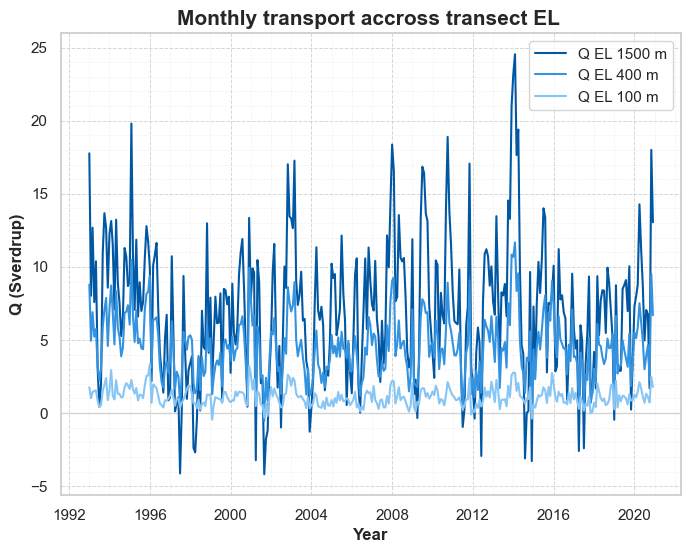

Plot saved to timeseries/timeseries_M_T1.png


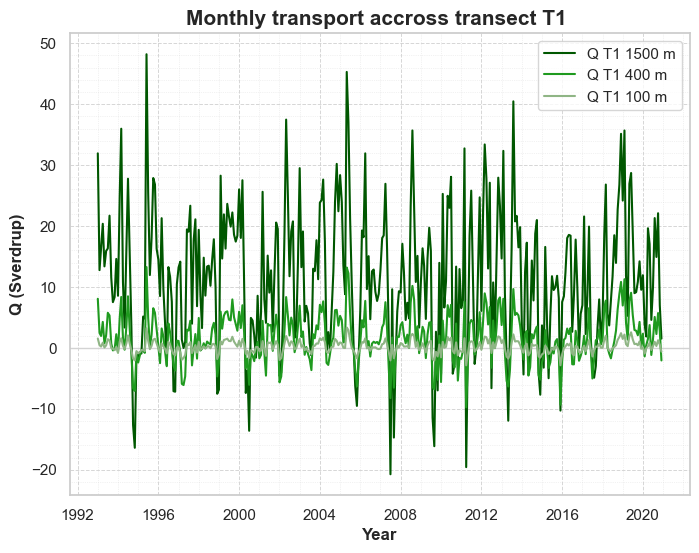

Plot saved to timeseries/timeseries_M_T2.png


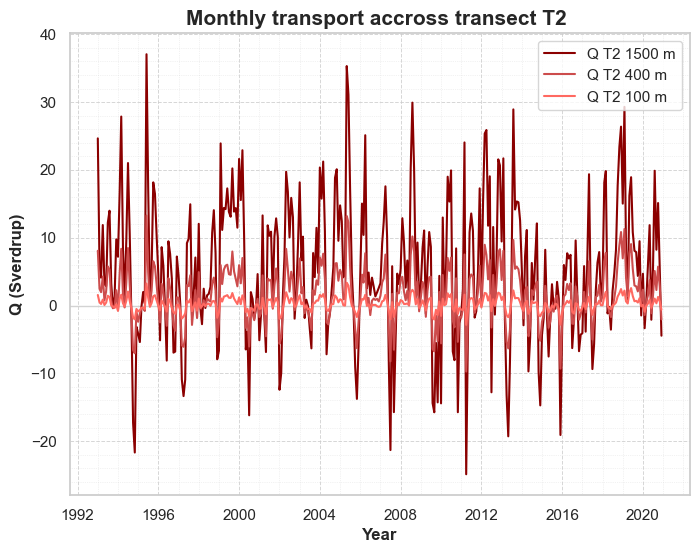

Plot saved to timeseries/timeseries_Y_EL.png


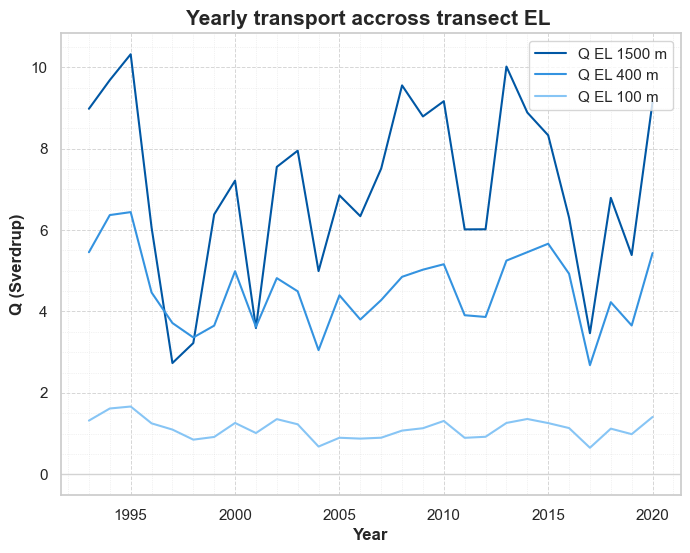

Plot saved to timeseries/timeseries_Y_T1.png


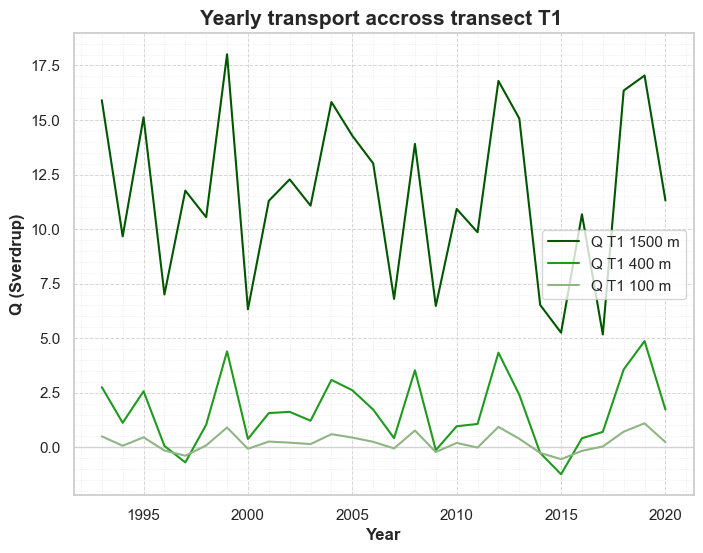

Plot saved to timeseries/timeseries_Y_T2.png


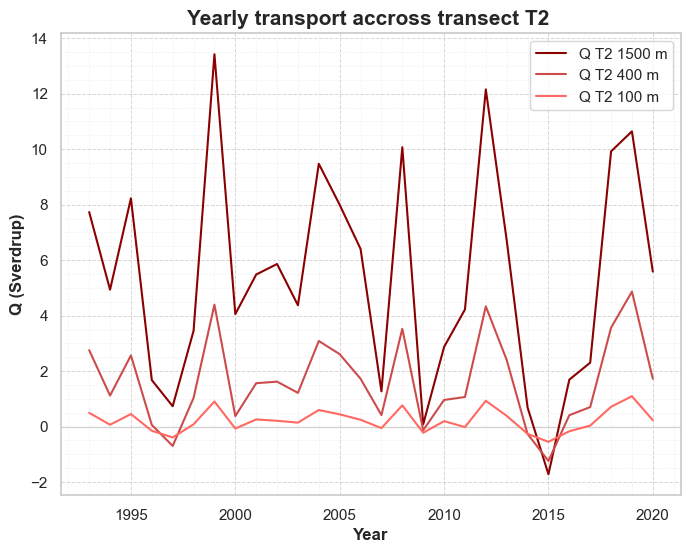

In [15]:
# MONTHLY

vars = ['date', 'flow_el_1500', 'flow_el_400', 'flow', ]
clrs = [cp['el_1500'], cp['el_400'], cp['el_100']]
labs = [xlabel_year, 'Q (Sverdrup)', 'Q EL 1500 m', 'Q EL 400 m', 'Q EL 100 m']
dt = df_monthly[(df_monthly['year']>=1993)]
title = 'Monthly transport accross transect EL '
save_path = "timeseries/timeseries_M_EL.png"
plot_timeseries(dt, vars, title, labs, clrs, save_path, False)

vars = ['date', 'flow_t1_1500', 'flow_t1_400', 'flow_t1_100', ]
clrs = [cp['t1_1500'], cp['t1_400'], cp['t1_100']]
labs = [xlabel_year, 'Q (Sverdrup)', 'Q T1 1500 m', 'Q T1 400 m', 'Q T1 100 m']
dt = df_monthly[(df_monthly['year']>=1993)]
title = 'Monthly transport accross transect T1 '
save_path = "timeseries/timeseries_M_T1.png"
plot_timeseries(dt, vars, title, labs, clrs, save_path, False)

vars = ['date', 'flow_t2_1500', 'flow_t2_400', 'flow_t2_100', ]
clrs = [cp['t2_1500'], cp['t2_400'], cp['t2_100']]
labs = [xlabel_year, 'Q (Sverdrup)', 'Q T2 1500 m', 'Q T2 400 m', 'Q T2 100 m']
dt = df_monthly[(df_monthly['year']>=1993)]
title = 'Monthly transport accross transect T2 '
save_path = "timeseries/timeseries_M_T2.png"
plot_timeseries(dt, vars, title, labs, clrs, save_path, False)

# YEARLY

vars = ['year', 'flow_el_1500', 'flow_el_400', 'flow', ]
clrs = [cp['el_1500'], cp['el_400'], cp['el_100']]
labs = [xlabel_year, 'Q (Sverdrup)', 'Q EL 1500 m', 'Q EL 400 m', 'Q EL 100 m']
dt = df_yearly[(df_yearly['year']>=1993)]
title = 'Yearly transport accross transect EL '
save_path = "timeseries/timeseries_Y_EL.png"
plot_timeseries(dt, vars, title, labs, clrs, save_path, False)

vars = ['year', 'flow_t1_1500', 'flow_t1_400', 'flow_t1_100', ]
clrs = [cp['t1_1500'], cp['t1_400'], cp['t1_100']]
labs = [xlabel_year, 'Q (Sverdrup)', 'Q T1 1500 m', 'Q T1 400 m', 'Q T1 100 m']
dt = df_yearly[(df_yearly['year']>=1993)]
title = 'Yearly transport accross transect T1 '
save_path = "timeseries/timeseries_Y_T1.png"
plot_timeseries(dt, vars, title, labs, clrs, save_path, False)

vars = ['year', 'flow_t2_1500', 'flow_t2_400', 'flow_t2_100', ]
clrs = [cp['t2_1500'], cp['t2_400'], cp['t2_100']]
labs = [xlabel_year, 'Q (Sverdrup)', 'Q T2 1500 m', 'Q T2 400 m', 'Q T2 100 m']
dt = df_yearly[(df_yearly['year']>=1993)]
title = 'Yearly transport accross transect T2 '
save_path = "timeseries/timeseries_Y_T2.png"
plot_timeseries(dt, vars, title, labs, clrs, save_path, False)

In [16]:
df_yearly.columns

Index(['year', 'wsc', 'wsc_norm', 'flow', 'flow_norm', 'flow_el_400',
       'flow_norm_el_400', 'flow_el_1500', 'flow_norm_el_1500', 'flow_t1_100',
       'flow_norm_t1_100', 'flow_t1_400', 'flow_norm_t1_400', 'flow_t1_1500',
       'flow_norm_t1_1500', 'flow_t2_100', 'flow_norm_t2_100', 'flow_t2_400',
       'flow_norm_t2_400', 'flow_t2_1500', 'flow_norm_t2_1500', 'si',
       'si_norm', 'spg', 'spg_norm'],
      dtype='object')

Plot saved to timeseries/timeseries_Y_100m.png


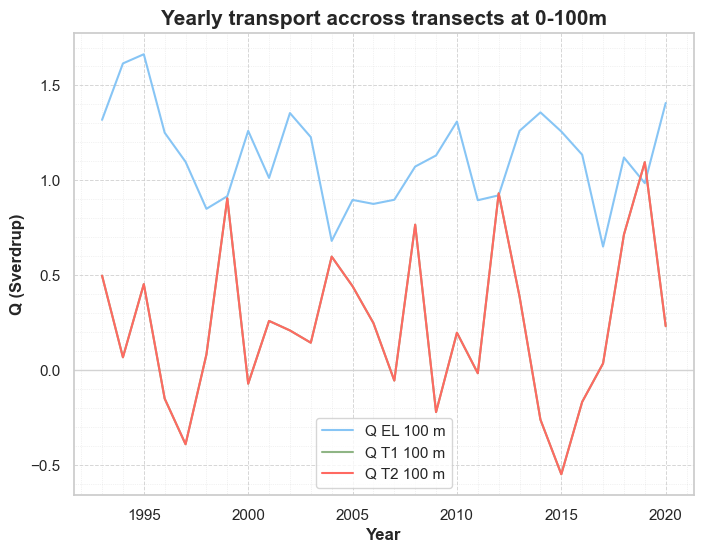

Plot saved to timeseries/timeseries_Y_400m.png


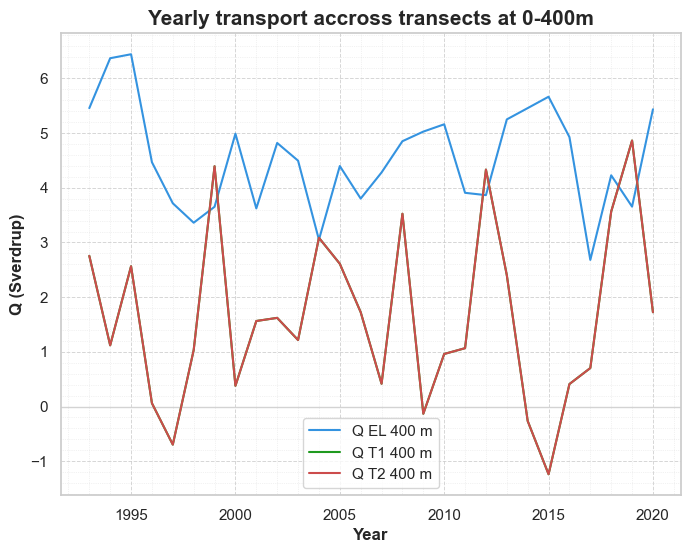

Plot saved to timeseries/timeseries_Y_1500m.png


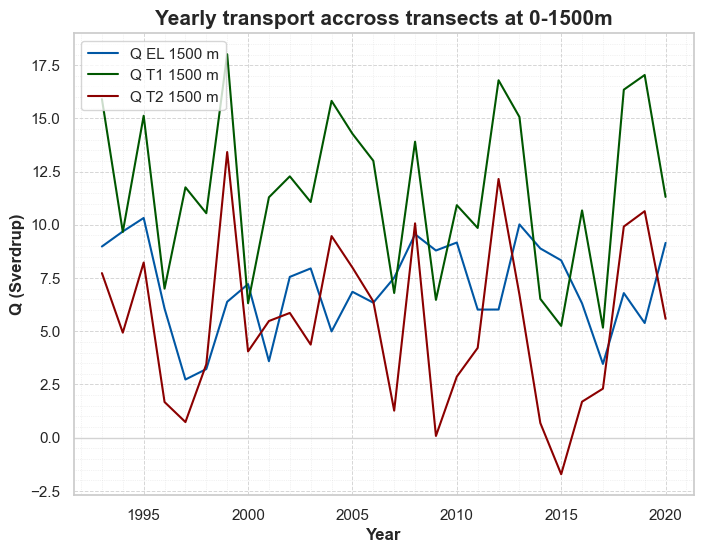

Plot saved to timeseries/timeseries_Y_indexes.png


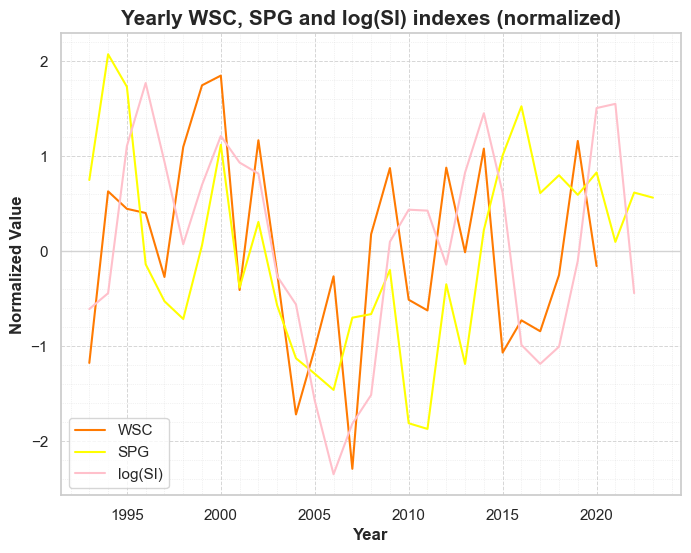

Plot saved to timeseries/timeseries_S_100m.png


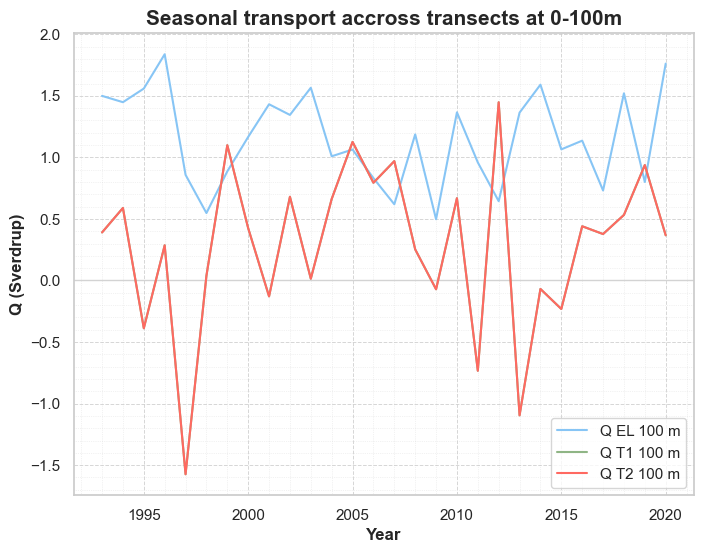

Plot saved to timeseries/timeseries_S_400m.png


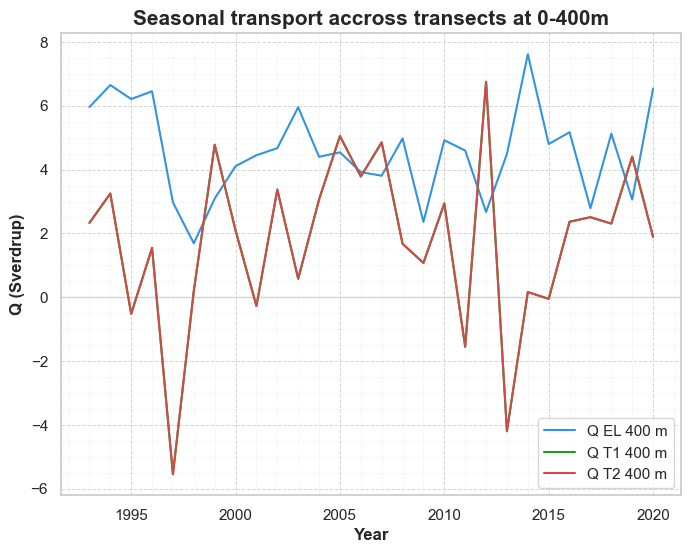

Plot saved to timeseries/timeseries_S_1500m.png


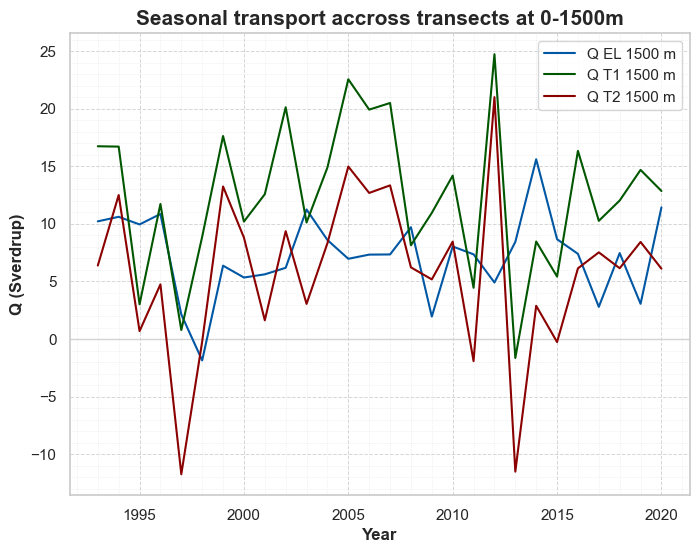

Plot saved to timeseries/timeseries_S_indexes.png


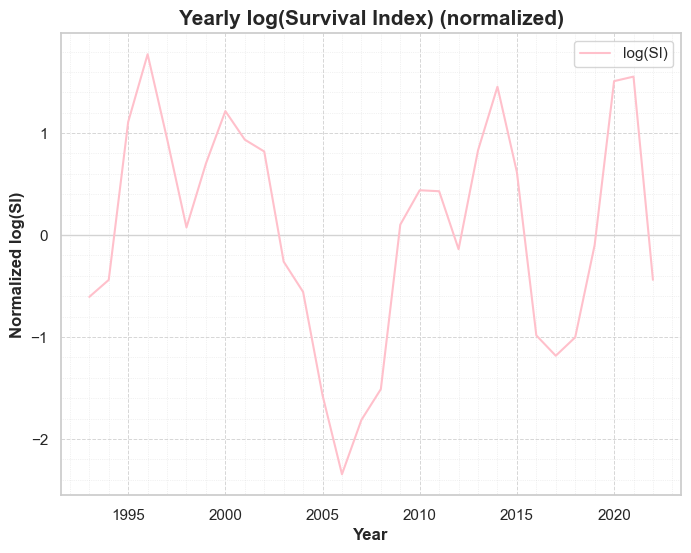

In [17]:
# # MONTHLY

# vars = ['date', 'flow', 'flow_t1_100', 'flow_t2_100']
# clrs = [cp['el_100'], cp['t1_100'], cp['t2_100']]
# labs = [xlabel_year, 'Q (Sverdrup)', 'Q EL 100 m', 'Q T1 100 m', 'Q T2 100 m']
# dt = df_monthly[(df_monthly['year']>=1993)]
# title = 'Monthly transport accross transects at 0-100m'
# save_path = "timeseries/timeseries_M_100m.png"
# plot_timeseries(dt, vars, title, labs, clrs, save_path, False)

# vars = ['date', 'flow_el_400', 'flow_t1_400', 'flow_t2_400']
# clrs = [cp['el_400'], cp['t1_400'], cp['t2_400']]
# labs = [xlabel_year, 'Q (Sverdrup)', 'Q EL 400 m', 'Q T1 400 m', 'Q T2 400 m']
# dt = df_monthly[(df_monthly['year']>=1993)]
# title = 'Monthly transport accross transects at 0-400m'
# save_path = "timeseries/timeseries_M_400m.png"
# plot_timeseries(dt, vars, title, labs, clrs, save_path, False)

# vars = ['date', 'flow_el_1500', 'flow_t1_1500', 'flow_t2_1500']
# clrs = [cp['el_1500'], cp['t1_1500'], cp['t2_1500']]
# labs = [xlabel_year, 'Q (Sverdrup)', 'Q EL 1500 m', 'Q T1 1500 m', 'Q T2 1500 m']
# dt = df_monthly[(df_monthly['year']>=1993)]
# title = 'Monthly transport accross transects at 0-1500m'
# save_path = "timeseries/timeseries_M_1500m.png"
# plot_timeseries(dt, vars, title, labs, clrs, save_path, False)

# vars = ['date', 'wsc']
# clrs = [cp['wsc']]
# labs = [xlabel_year, label_normalized_wsc, 'WSC']
# dt = df_monthly[(df_monthly['year']>=1993)]
# title = 'Monthly WSC'
# save_path = "timeseries/timeseries_M_wsc.png"
# plot_timeseries(dt, vars, title, labs, clrs, save_path, False)

# # YEARLY

vars = ['year', 'flow', 'flow_t1_100', 'flow_t2_100']
clrs = [cp['el_100'], cp['t1_100'], cp['t2_100']]
labs = [xlabel_year, 'Q (Sverdrup)', 'Q EL 100 m', 'Q T1 100 m', 'Q T2 100 m']
dt = df_yearly[(df_yearly['year']>=1993)]
title = 'Yearly transport accross transects at 0-100m'
save_path = "timeseries/timeseries_Y_100m.png"
plot_timeseries(dt, vars, title, labs, clrs, save_path, False)

vars = ['year', 'flow_el_400', 'flow_t1_400', 'flow_t2_400']
clrs = [cp['el_400'], cp['t1_400'], cp['t2_400']]
labs = [xlabel_year, 'Q (Sverdrup)', 'Q EL 400 m', 'Q T1 400 m', 'Q T2 400 m']
dt = df_yearly[(df_yearly['year']>=1993)]
title = 'Yearly transport accross transects at 0-400m'
save_path = "timeseries/timeseries_Y_400m.png"
plot_timeseries(dt, vars, title, labs, clrs, save_path, False)

vars = ['year', 'flow_el_1500', 'flow_t1_1500', 'flow_t2_1500']
clrs = [cp['el_1500'], cp['t1_1500'], cp['t2_1500']]
labs = [xlabel_year, 'Q (Sverdrup)', 'Q EL 1500 m', 'Q T1 1500 m', 'Q T2 1500 m']
dt = df_yearly[(df_yearly['year']>=1993)]
title = 'Yearly transport accross transects at 0-1500m'
save_path = "timeseries/timeseries_Y_1500m.png"
plot_timeseries(dt, vars, title, labs, clrs, save_path, False)

vars = ['year', 'wsc_norm', 'spg_norm', 'si_norm']
clrs = [cp['wsc'], cp['spg'], cp['blue']]
labs = [xlabel_year, ylabel_normalized_value, 'WSC', 'SPG', 'log(SI)']
dt = df_yearly[(df_yearly['year']>=1993)]
title = 'Yearly WSC, SPG and log(SI) indexes (normalized)'
save_path = "timeseries/timeseries_Y_indexes.png"
plot_timeseries(dt, vars, title, labs, clrs, save_path, False)



# WITH INDEXES

# vars = ['year', 'flow', 'flow_t1_100', 'flow_t2_100', 'wsc_norm', 'spg_norm', 'si_norm']
# clrs = [cp['el_100'], cp['t1_100'], cp['t2_100'], cp['wsc'], cp['spg'], cp['blue']]
# labs = [xlabel_year, 'Q (Sverdrup)', 'Q EL 100 m', 'Q T1 100 m', 'Q T2 100 m', 'WSC', 'SPG', 'log(SI)', ylabel_normalized_value]
# dt = df_yearly[(df_yearly['year']>=1993)]
# title = 'Yearly transport accross transects at 0-100m, and normalized WSC, SPG and log(SI)'
# save_path = "timeseries/timeseries_Y_100m_indexes.png"
# plot_timeseries(dt, vars, title, labs, clrs, save_path, True)

# vars = ['year', 'flow_el_400', 'flow_t1_400', 'flow_t2_400', 'wsc_norm', 'spg_norm', 'si_norm']
# clrs = [cp['el_400'], cp['t1_400'], cp['t2_400'], cp['wsc'], cp['spg'], cp['blue']]
# labs = [xlabel_year, 'Q (Sverdrup)', 'Q EL 400 m', 'Q T1 400 m', 'Q T2 400 m', 'WSC', 'SPG', 'log(SI)', ylabel_normalized_value]
# dt = df_yearly[(df_yearly['year']>=1993)]
# title = 'Yearly transport accross transects at 0-400m, and normalized WSC, SPG and log(SI)'
# save_path = "timeseries/timeseries_Y_400m_indexes.png"
# plot_timeseries(dt, vars, title, labs, clrs, save_path, True)

# vars = ['year', 'flow_el_1500', 'flow_t1_1500', 'flow_t2_1500', 'wsc_norm', 'spg_norm', 'si_norm']
# clrs = [cp['el_1500'], cp['t1_1500'], cp['t2_1500'], cp['wsc'], cp['spg'], cp['blue']]
# labs = [xlabel_year, 'Q (Sverdrup)', 'Q EL 1500 m', 'Q T1 1500 m', 'Q T2 1500 m', 'WSC', 'SPG', 'log(SI)', ylabel_normalized_value]
# dt = df_yearly[(df_yearly['year']>=1993)]
# title = 'Yearly transport accross transects at 0-1500m, and normalized WSC, SPG and log(SI)'
# save_path = "timeseries/timeseries_Y_1500m_indexes.png"
# plot_timeseries(dt, vars, title, labs, clrs, save_path, True)

# ONLY SI
vars = ['year', 'flow', 'flow_t1_100', 'flow_t2_100']
clrs = [cp['el_100'], cp['t1_100'], cp['t2_100']]
labs = [xlabel_year, 'Q (Sverdrup)', 'Q EL 100 m', 'Q T1 100 m', 'Q T2 100 m']
dt = df_seasonal[(df_seasonal['year']>=1993)]
title = 'Seasonal transport accross transects at 0-100m'
save_path = "timeseries/timeseries_S_100m.png"
plot_timeseries(dt, vars, title, labs, clrs, save_path, False)

vars = ['year', 'flow_el_400', 'flow_t1_400', 'flow_t2_400']
clrs = [cp['el_400'], cp['t1_400'], cp['t2_400']]
labs = [xlabel_year, 'Q (Sverdrup)', 'Q EL 400 m', 'Q T1 400 m', 'Q T2 400 m']
dt = df_seasonal[(df_seasonal['year']>=1993)]
title = 'Seasonal transport accross transects at 0-400m'
save_path = "timeseries/timeseries_S_400m.png"
plot_timeseries(dt, vars, title, labs, clrs, save_path, False)

vars = ['year', 'flow_el_1500', 'flow_t1_1500', 'flow_t2_1500']
clrs = [cp['el_1500'], cp['t1_1500'], cp['t2_1500']]
labs = [xlabel_year, 'Q (Sverdrup)', 'Q EL 1500 m', 'Q T1 1500 m', 'Q T2 1500 m']
dt = df_seasonal[(df_seasonal['year']>=1993)]
title = 'Seasonal transport accross transects at 0-1500m'
save_path = "timeseries/timeseries_S_1500m.png"
plot_timeseries(dt, vars, title, labs, clrs, save_path, False)

vars = ['year', 'si_norm']
clrs = [cp['blue']]
labs = [xlabel_year, 'Normalized log(SI)', 'log(SI)']
dt = df_seasonal[(df_seasonal['year']>=1993)]
title = 'Yearly log(Survival Index) (normalized)'
save_path = "timeseries/timeseries_S_indexes.png"
plot_timeseries(dt, vars, title, labs, clrs, save_path, False)

# DUAL
# vars = ['year', 'flow', 'flow_t1_100', 'flow_t2_100', 'si_norm']
# clrs = [cp['el_100'], cp['t1_100'], cp['t2_100'], cp['blue']]
# labs = [xlabel_year, 'Q (Sverdrup)', 'Q EL 100 m', 'Q T1 100 m', 'Q T2 100 m', 'log(SI)', ylabel_normalized_value]
# dt = df_seasonal[(df_seasonal['year']>=1993)]
# title = 'Seasonal transport accross transects at 0-100m, and normalized log(SI)'
# save_path = "timeseries/timeseries_S_100m_indexes.png"
# plot_timeseries(dt, vars, title, labs, clrs, save_path, True)

# vars = ['year', 'flow_el_400', 'flow_t1_400', 'flow_t2_400', 'si_norm']
# clrs = [cp['el_400'], cp['t1_400'], cp['t2_400'], cp['blue']]
# labs = [xlabel_year, 'Q (Sverdrup)', 'Q EL 400 m', 'Q T1 400 m', 'Q T2 400 m', 'log(SI)', ylabel_normalized_value]
# dt = df_seasonal[(df_seasonal['year']>=1993)]
# title = 'Seasonal transport accross transects at 0-400m, and normalized log(SI)'
# save_path = "timeseries/timeseries_S_400m_indexes.png"
# plot_timeseries(dt, vars, title, labs, clrs, save_path, True)

# vars = ['year', 'flow_el_1500', 'flow_t1_1500', 'flow_t2_1500', 'si_norm']
# clrs = [cp['el_1500'], cp['t1_1500'], cp['t2_1500'], cp['blue']]
# labs = [xlabel_year, 'Q (Sverdrup)', 'Q EL 1500 m', 'Q T1 1500 m', 'Q T2 1500 m', 'log(SI)', ylabel_normalized_value]
# dt = df_seasonal[(df_seasonal['year']>=1993)]
# title = 'Seasonal transport accross transects at 0-1500m, and normalized log(SI)'
# save_path = "timeseries/timeseries_S_1500m_indexes.png"
# plot_timeseries(dt, vars, title, labs, clrs, save_path, True)

In [18]:
# results_df_M = results_df[results_df['Resolution'] == 'M']
# results_df_M100 = results_df[
#     (results_df['Resolution'] == 'M') &
#     (results_df['Variable 1'].str.endswith('100') | results_df['Variable 1'] == 'WSC') &
#     (results_df['Variable 2'].str.endswith('100'))
# ]
# results_df_M400 = results_df[
#     (results_df['Resolution'] == 'M') &
#     (results_df['Variable 1'].str.endswith('400') | results_df['Variable 1'] == 'WSC') &
#     (results_df['Variable 2'].str.endswith('400'))
# ]
# results_df_M1500 = results_df[
#     (results_df['Resolution'] == 'M') &
#     (results_df['Variable 1'].str.endswith('1500') | results_df['Variable 1'] == 'WSC') &
#     (results_df['Variable 2'].str.endswith('1500'))
# ]
# results_df_Y = results_df[results_df['Resolution'] == 'Y']
# results_df_Y100 = results_df[
#     (results_df['Resolution'] == 'Y') &
#     (results_df['Variable 1'].str.endswith('100') | results_df['Variable 1'].isin(['WSC', 'SPG', 'SI'])) &
#     (results_df['Variable 2'].str.endswith('100'))
# ]
# results_df_Y400 = results_df[
#     (results_df['Resolution'] == 'Y') &
#     (results_df['Variable 1'].str.endswith('400') | results_df['Variable 1'].isin(['WSC', 'SPG', 'SI'])) &
#     (results_df['Variable 2'].str.endswith('400'))
# ]
# results_df_Y1500 = results_df[
#     (results_df['Resolution'] == 'Y') &
#     (results_df['Variable 1'].str.endswith('1500') | results_df['Variable 1'].isin(['WSC', 'SPG', 'SI'])) &
#     (results_df['Variable 2'].str.endswith('1500'))
# ]

# results_df_S = results_df[results_df['Resolution'] == 'S']
# results_df_S100 = results_df[
#     (results_df['Resolution'] == 'S') &
#     (results_df['Variable 1'].str.endswith('100')) &
#     (results_df['Variable 2'].str.endswith('100') | results_df['Variable 2'] == 'SI')
# ]
# results_df_S400 = results_df[
#     (results_df['Resolution'] == 'S') &
#     (results_df['Variable 1'].str.endswith('400')) &
#     (results_df['Variable 2'].str.endswith('400') | results_df['Variable 2'] == 'SI')s
# ]
# results_df_S1500 = results_df[
#     (results_df['Resolution'] == 'S') &
#     (results_df['Variable 1'].str.endswith('1500')) &
#     (results_df['Variable 2'].str.endswith('1500') | results_df['Variable 2'] == 'SI')
# ]

# results_df_M100

In [19]:
# def filter_results(df, resolution, var1_suffixes, var2_suffixes):
#     return df[
#         (df['Resolution'] == resolution) &
#         (df['Variable 1'].str.endswith(tuple(var1_suffixes)) | df['Variable 1'].isin(['WSC', 'SPG', 'SI'])) &
#         (df['Variable 2'].str.endswith(tuple(var2_suffixes)) | df['Variable 2'].isin(['WSC', 'SPG', 'SI', 'SI']))
#     ]


In [20]:
# results_df_M100 = filter_results(results_df, 'M', ['100'], ['100'])
# results_df_M400 = filter_results(results_df, 'M', ['400'], ['400'])
# results_df_M1500 = filter_results(results_df, 'M', ['1500'], ['1500'])

# results_df_Y100 = filter_results(results_df, 'Y', ['100'], ['100'])
# results_df_Y400 = filter_results(results_df, 'Y', ['400'], ['400'])
# results_df_Y1500 = filter_results(results_df, 'Y', ['1500'], ['1500'])

# results_df_S100 = filter_results(results_df, 'S', ['100'], ['100', 'SI'])
# results_df_S400 = filter_results(results_df, 'S', ['400'], ['400', 'SI'])
# results_df_S1500 = filter_results(results_df, 'S', ['1500'], ['1500', 'SI'])


In [21]:
# Step 1: Load the Excel data
file_path = 'regression_results.xlsx'  # Replace with the path to your Excel file
imported_df = pd.read_excel(file_path)

imported_df['Correlation'] = (
    imported_df['Variable 1']
    .str.replace('_norm', '', regex=False)  # Remove '_norm'
    .str.upper()  # Convert to uppercase
    .str.replace('_', ' ', regex=False)  # Replace '_' with spaces
    .apply(lambda x: x.replace('FLOW', '').strip() if 'FLOW' in x and any(num in x for num in ['100', '400', '1500']) else 
           'EL 100' if x.strip() == 'FLOW' else x)  # Remove 'FLOW' if followed by a number, add 'EL 100' if only 'FLOW'
    .apply(lambda x: 'Q ' + x if any(num in x for num in ['100', '400', '1500']) else x) +  # Add 'Q' for variables with numbers
    ' vs ' +
    imported_df['Variable 2']
    .str.replace('_norm', '', regex=False)  # Remove '_norm'
    .str.upper()  # Convert to uppercase
    .str.replace('_', ' ', regex=False)  # Replace '_' with spaces
    .apply(lambda x: x.replace('FLOW', '').strip() if 'FLOW' in x and any(num in x for num in ['100', '400', '1500']) else 
           'EL 100' if x.strip() == 'FLOW' else x)  # Remove 'FLOW' if followed by a number, add 'EL 100' if only 'FLOW'
    .apply(lambda x: 'Q ' + x if any(num in x for num in ['100', '400', '1500']) else x) +
    ' (lag=' + imported_df['Lag'].astype(str) + ')'  # Add lag information
)



Plot saved to correlations_M.png


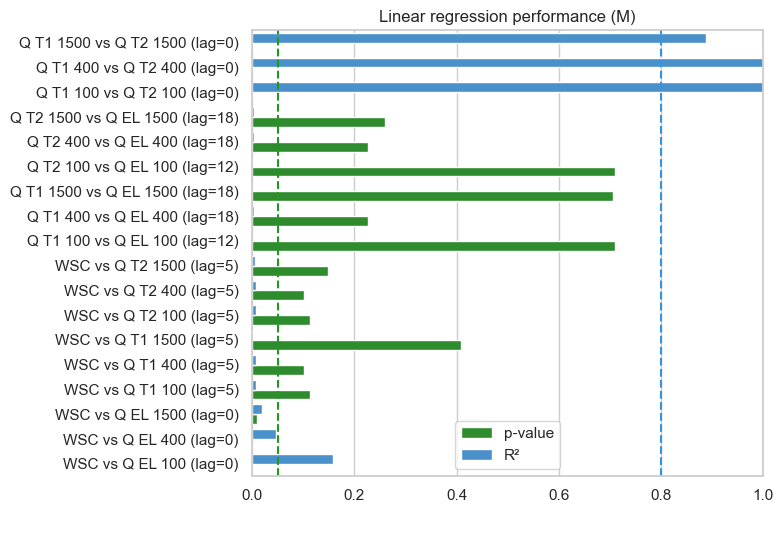

In [22]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# Step 2: Extract necessary columns
df = imported_df[imported_df['Resolution'] == 'M'][['Correlation', 'p-value', 'R²']]

# Prepare data for Seaborn
df_melted = df.melt(id_vars=['Correlation'], value_vars=['p-value', 'R²'], var_name='Metric', value_name='Value')

# Step 3: Create the plot using Seaborn
plt.figure(figsize=(8, 5.5))

# Create the bar plot with Seaborn
sns.barplot(data=df_melted, y='Correlation', x='Value', hue='Metric', palette=[cp['t1_400'], cp['el_400']], dodge=True)

# Add vertical dashed lines at x = 0.05 for p-value and x = 0.8 for R²
plt.axvline(x=0.05, color=cp['t1_400'], linestyle='--')
plt.axvline(x=0.8, color=cp['el_400'], linestyle='--')


# Step 4: Customize plot
plt.xlabel(' ')
plt.ylabel('')
plt.title('Linear regression performance (M)')

# Move the legend outside and place it at the bottom center with side-by-side labels
# plt.legend(bbox_to_anchor=(0.5, -0.02), loc='lower center', borderaxespad=0., ncol=2)
plt.legend()
# Manually adjust y-axis limits to remove excess space
plt.ylim(-0.5, len(df) - 0.5)
plt.xlim(0, 1)



# Show plot
plt.tight_layout()

# Save and show the plot
save_path = "correlations_M.png"
plt.savefig(save_path, dpi=300, bbox_inches='tight')
print(f"Plot saved to {save_path}")
plt.show()



Plot saved to correlations_Y.png


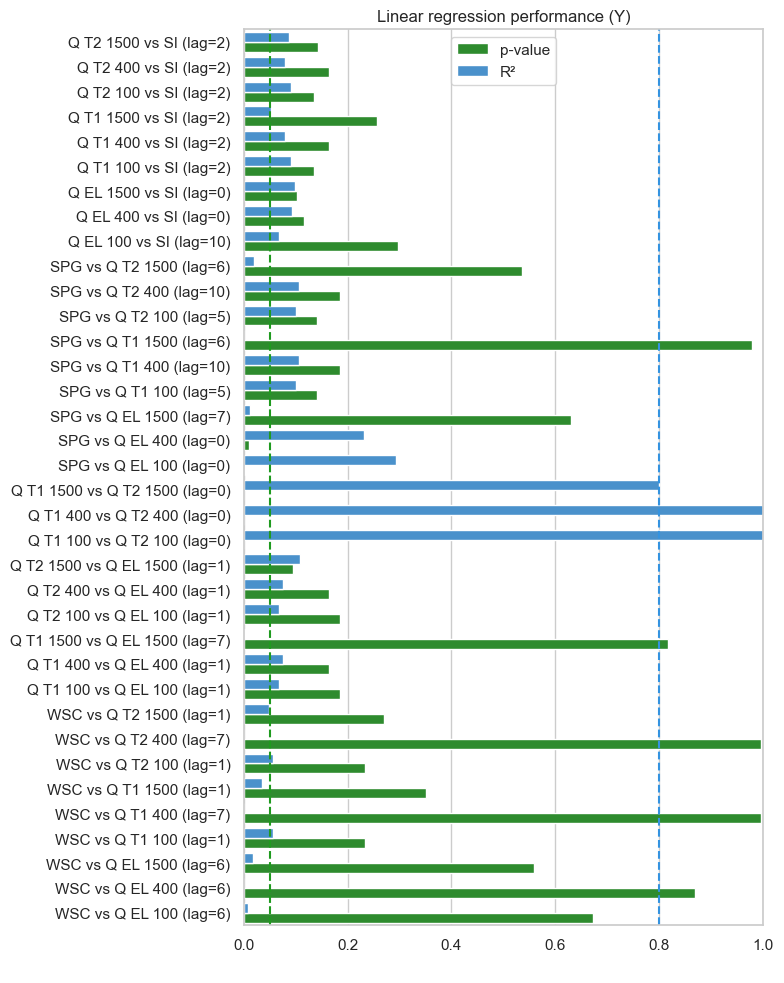

In [23]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# Step 2: Extract necessary columns
df = imported_df[imported_df['Resolution'] == 'Y'][['Correlation', 'p-value', 'R²']]

# Prepare data for Seaborn
df_melted = df.melt(id_vars=['Correlation'], value_vars=['p-value', 'R²'], var_name='Metric', value_name='Value')

# Step 3: Create the plot using Seaborn
plt.figure(figsize=(8, 10))

# Create the bar plot with Seaborn
sns.barplot(data=df_melted, y='Correlation', x='Value', hue='Metric', palette=[cp['t1_400'], cp['el_400']], dodge=True)

# Add vertical dashed lines at x = 0.05 for p-value and x = 0.8 for R²
plt.axvline(x=0.05, color=cp['t1_400'], linestyle='--')
plt.axvline(x=0.8, color=cp['el_400'], linestyle='--')


# Step 4: Customize plot
plt.xlabel(' ')
plt.ylabel('')
plt.title('Linear regression performance (Y)')

# Move the legend outside and place it at the bottom center with side-by-side labels
# plt.legend(bbox_to_anchor=(0.5, -0.02), loc='lower center', borderaxespad=0., ncol=2)
plt.legend()
# Manually adjust y-axis limits to remove excess space
plt.ylim(-0.5, len(df) - 0.5)
plt.xlim(0, 1)

# Show plot
plt.tight_layout()

# Save and show the plot
save_path = "correlations_Y.png"
plt.savefig(save_path, dpi=300, bbox_inches='tight')
print(f"Plot saved to {save_path}")
plt.show()
plt.show()


Plot saved to correlations_S.png


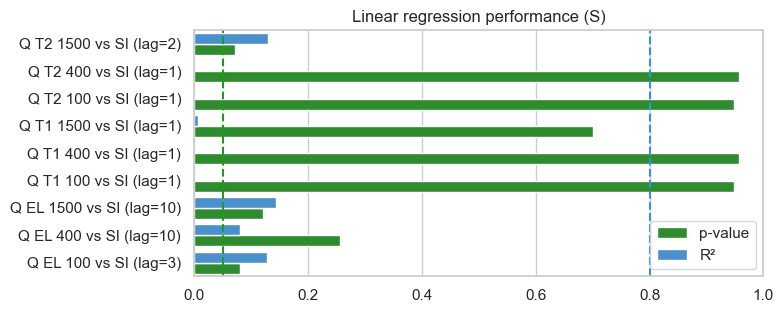

In [24]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# Step 2: Extract necessary columns
df = imported_df[imported_df['Resolution'] == 'S'][['Correlation', 'p-value', 'R²']]

# Prepare data for Seaborn
df_melted = df.melt(id_vars=['Correlation'], value_vars=['p-value', 'R²'], var_name='Metric', value_name='Value')

# Step 3: Create the plot using Seaborn
plt.figure(figsize=(8, 3.5))

# Create the bar plot with Seaborn
sns.barplot(data=df_melted, y='Correlation', x='Value', hue='Metric', palette=[cp['t1_400'], cp['el_400']], dodge=True)

# Add vertical dashed lines at x = 0.05 for p-value and x = 0.8 for R²
plt.axvline(x=0.05, color=cp['t1_400'], linestyle='--')
plt.axvline(x=0.8, color=cp['el_400'], linestyle='--')


# Step 4: Customize plot
plt.xlabel(' ')
plt.ylabel('')
plt.title('Linear regression performance (S)')

# Move the legend outside and place it at the bottom center with side-by-side labels
# plt.legend(bbox_to_anchor=(0.5, -0.02), loc='lower center', borderaxespad=0., ncol=2)
plt.legend()
# Manually adjust y-axis limits to remove excess space
plt.ylim(-0.5, len(df) - 0.5)
plt.xlim(0, 1)


# Show plot
plt.tight_layout()

# Save and show the plot
save_path = "correlations_S.png"
plt.savefig(save_path, dpi=300, bbox_inches='tight')
print(f"Plot saved to {save_path}")
plt.show()
plt.show()


In [25]:
velocitiesEL = pd.read_excel('data/Velocities_1993_2020.xlsx', sheet_name= 'V EL (M)')
velocitiesT1 = pd.read_excel('data/Velocities_1993_2020.xlsx', sheet_name= 'V T1 (M)')
velocitiesT2 = pd.read_excel('data/Velocities_1993_2020.xlsx', sheet_name= 'V T2 (M)')

In [26]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.colors as mcolors
from cartopy.mpl.gridliner import LongitudeFormatter

def plot_monthly_data_in_subfigures(df, name, time_period='Month', save_as=None):
    '''Plot the 12 months in 12 subfigures for the monthly averaged data (2D Depth vs Longitude).'''

    # Set Seaborn style
    sns.set(style="whitegrid")

    # Ensure 'Month' is a column and format it correctly
    if time_period == 'Date':
        if 'Date' not in df.columns:
            df['Date'] = df['Year'].astype(str) + '-' + df['Month'].astype(str)
            df['Date'] = pd.to_datetime(df['Date'], format='%Y-%m')
        df = df.sort_values(by='Date')
    elif time_period == 'Month':
        df['Month'] = df['Month'].astype(str).str.zfill(2)

    # Set up months as groups
    groups = sorted(df[time_period].unique())

    # Shared properties for color scale
    minv, maxv = float('inf'), float('-inf')
    minv = min(np.nanmin(df['Velocity']), minv)
    maxv = max(np.nanmax(df['Velocity']), maxv)
    cbar_limit = max(abs(minv), abs(maxv))
    colors = ["red", "yellow", "green"]
    cmap_name = "custom_vivid"
    cmap = mcolors.LinearSegmentedColormap.from_list(cmap_name, colors, N=256)
    cmap.set_bad(color='grey')

    # Create a 3x4 grid of subplots (12 months)
    fig, axes = plt.subplots(4, 3, figsize=(12, 16))

    # Flatten the axes to make iteration easier
    axes = axes.flatten()

    # Set labels for the entire plot
    for i, target in enumerate(groups):
        ax = axes[i]
        
        # Handle different time periods when filtering the data
        if time_period == 'Date':
            data = df[df['Date'] == target]
            # Extract year and month for title
            target = target.strftime('%Y-%m')  # Format as 'YYYY-MM'
        else:
            data = df[df[time_period] == target]
        
        # Plot the data for each month (2D Depth vs Longitude)
        sc = ax.scatter(data['Longitude'], data['Depth'], 
                        c=data['Velocity'], cmap=cmap, s=50, 
                        vmin=-cbar_limit, vmax=cbar_limit)
        
        # Set subplot title and labels
        ax.set_title(f"{target}", fontsize=14, fontweight='bold')  # Bold and increased font size
        ax.set_xlabel('Longitude', fontsize=12)
        ax.xaxis.set_major_formatter(LongitudeFormatter())
        ax.set_ylabel('Depth', fontsize=12)
        ax.invert_yaxis()  # Invert y-axis (depth)

    # Add a single colorbar outside the plots (to the right)
    cbar_ax = fig.add_axes([0.92, 0.15, 0.03, 0.7])  # Adjusted to place colorbar outside the plot area
    cbar = fig.colorbar(sc, cax=cbar_ax)
    cbar.set_label('Velocity (m/s)', fontsize=14)
    cbar.set_ticks([minv, 0, maxv])
    cbar.ax.tick_params(labelsize=12)  # Increase font size for ticks

    # Adjust layout for better spacing
    plt.tight_layout()

    # Adjust suptitle position above the plots
    plt.suptitle(f'Current velocity grid through transect {name}', fontsize=18, fontweight='bold', y=1.03)

    # Adjust subplot spacing to leave space for the colorbar
    plt.subplots_adjust(right=0.88)  # Leave space for the colorbar
    
    # Save the plot if requested
    if save_as:
        plt.savefig(save_as, dpi=300, bbox_inches='tight')  # Save as image file
    else:
        plt.show()


C:\Users\franc\AppData\Local\Temp\ipykernel_38816\2455918739.py:74: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


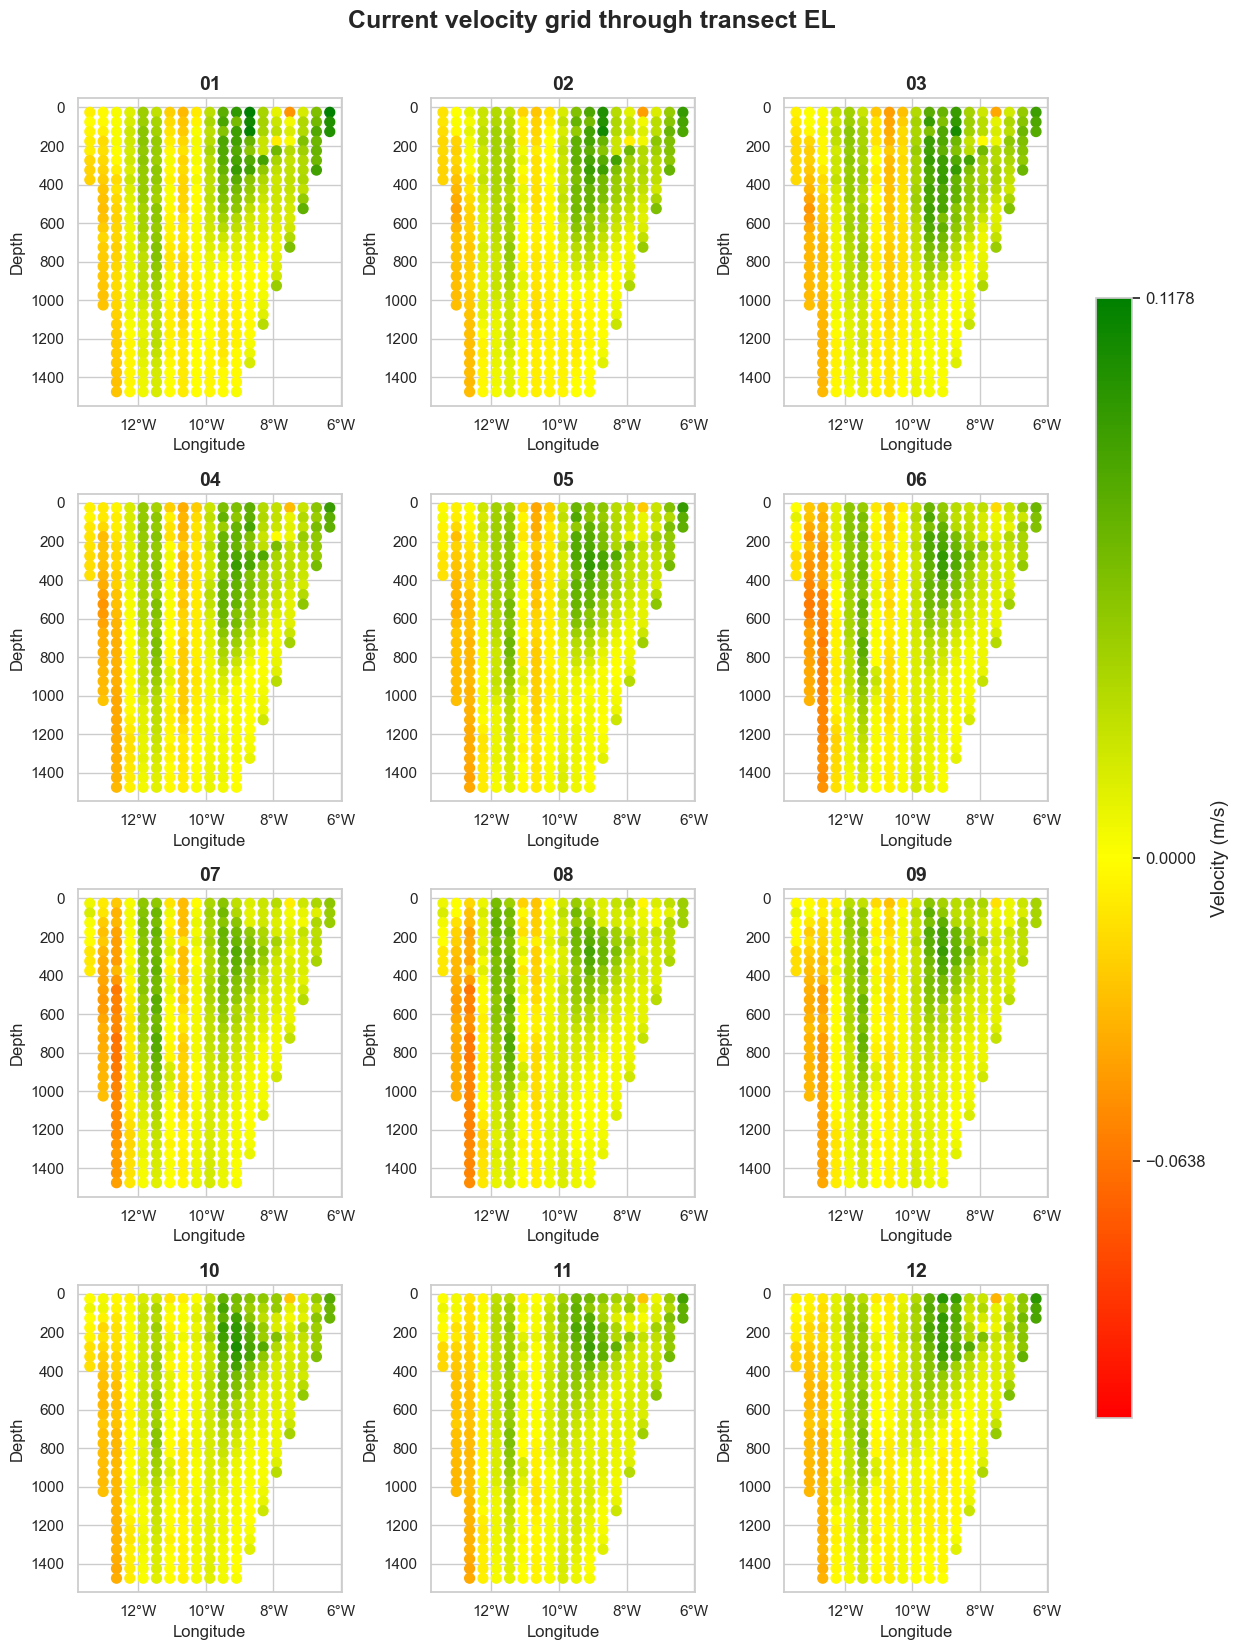

In [27]:
# Assuming df is your DataFrame with the necessary columns ('Longitude', 'Latitude', 'Depth', 'Velocity', etc.)
plot_monthly_data_in_subfigures(velocitiesEL, 'EL', 'Month', save_as='velocitiesEL.png')


C:\Users\franc\AppData\Local\Temp\ipykernel_38816\2455918739.py:74: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()
C:\Users\franc\AppData\Local\Temp\ipykernel_38816\2455918739.py:74: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


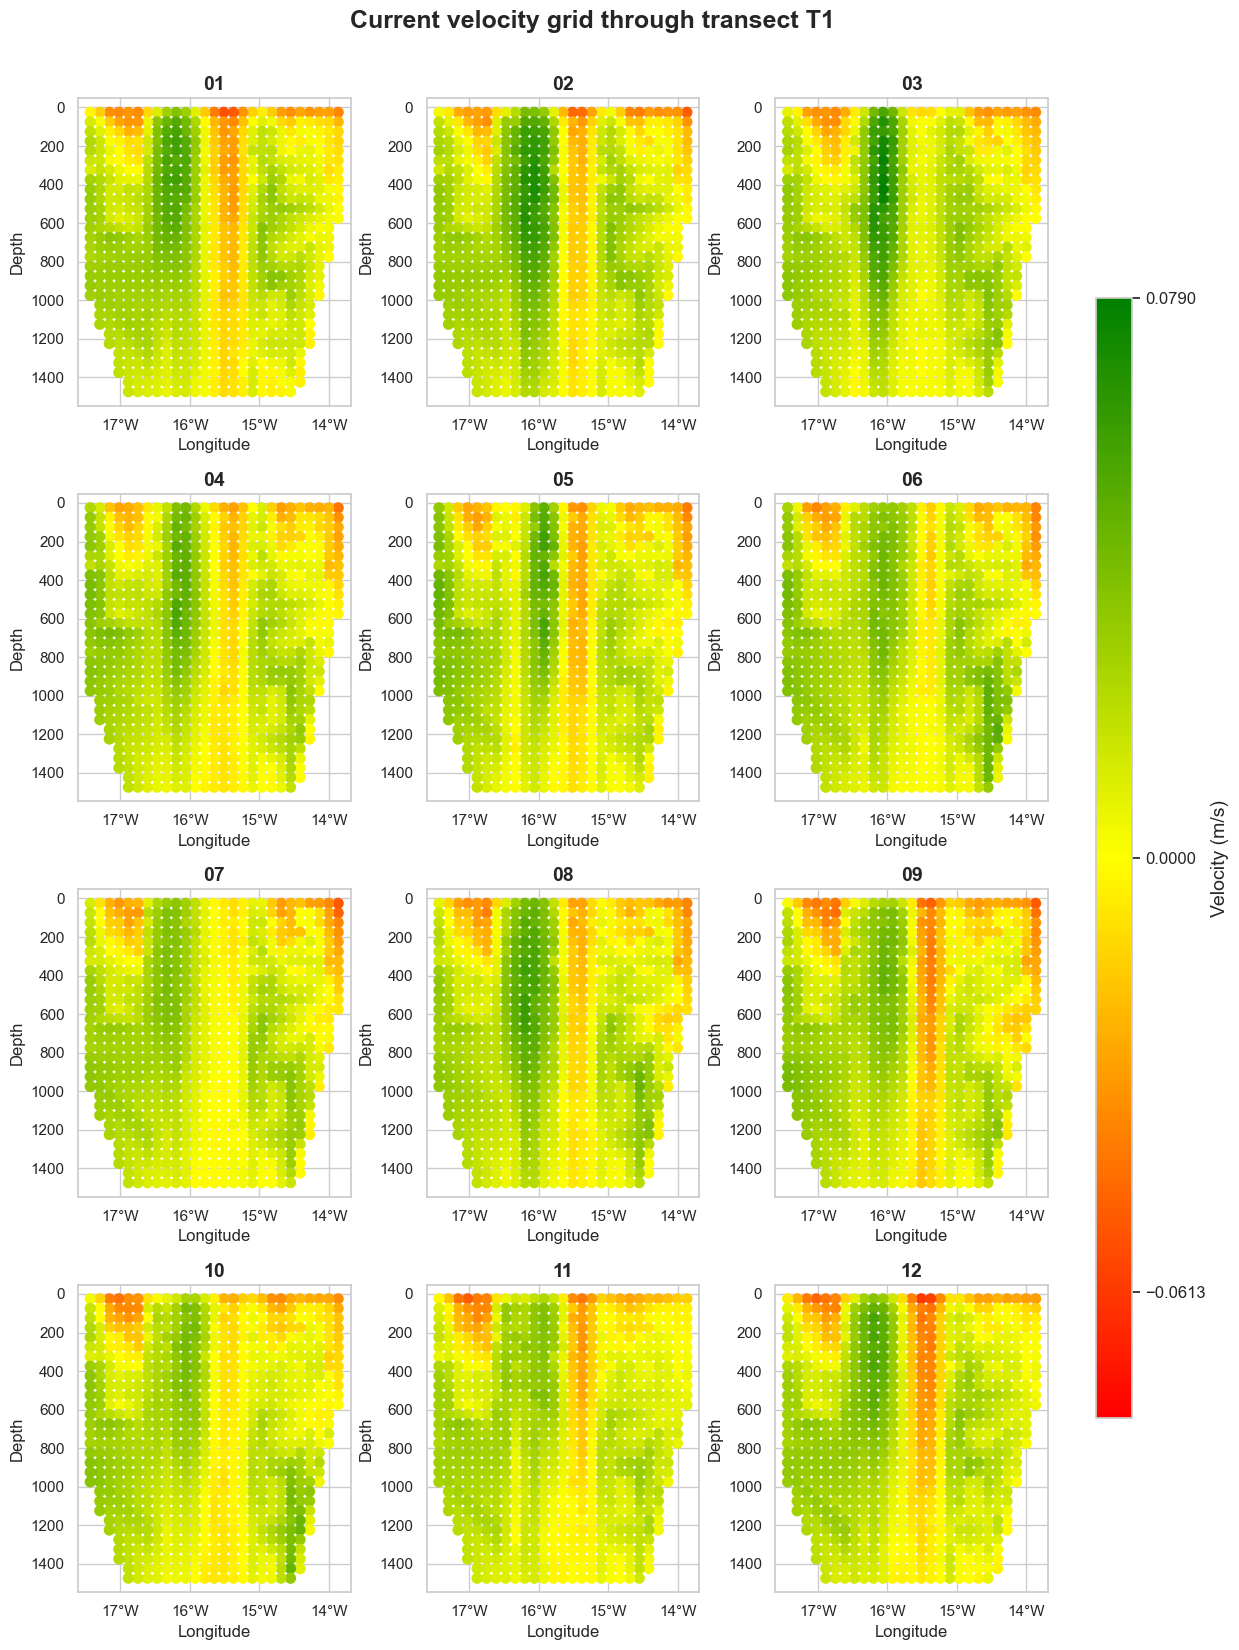

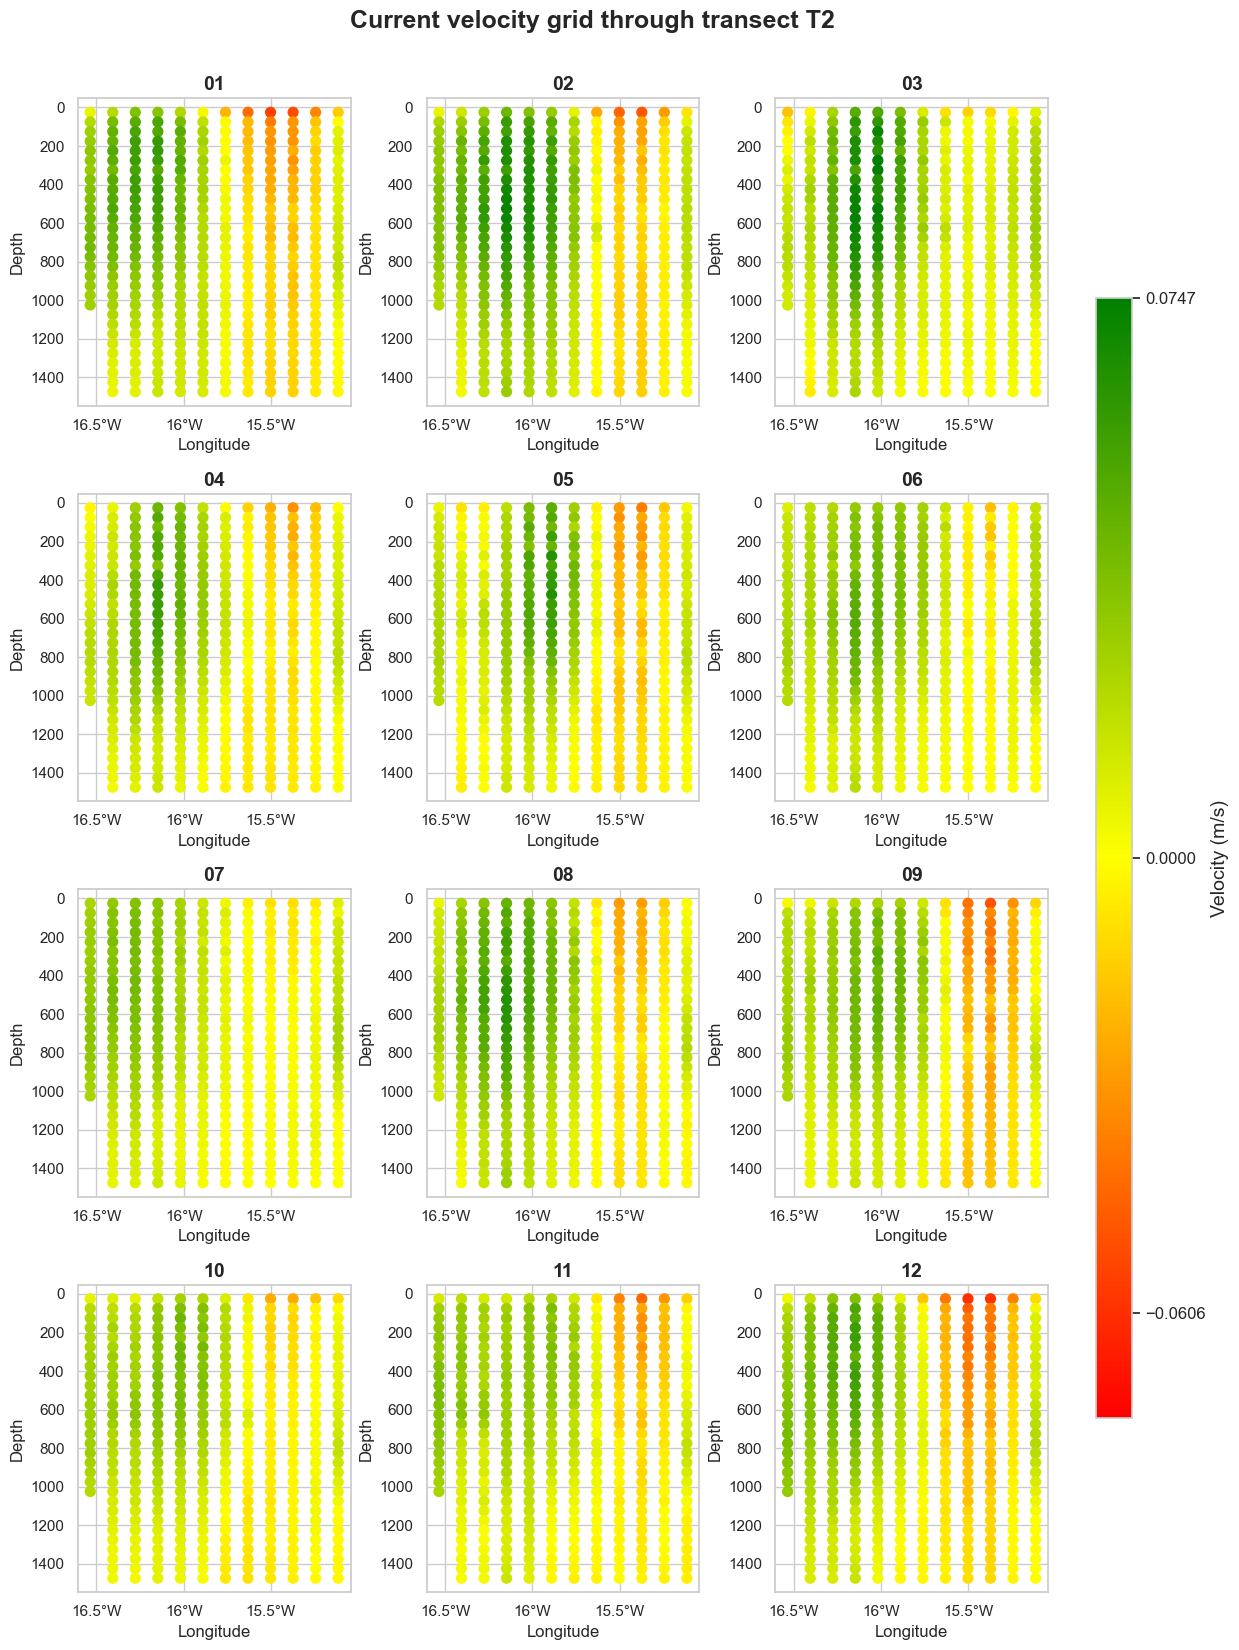

In [28]:
plot_monthly_data_in_subfigures(velocitiesT1, 'T1', time_period='Month', save_as='velocitiesT1.png')
plot_monthly_data_in_subfigures(velocitiesT2, 'T2', time_period='Month', save_as='velocitiesT2.png')
